<a href="https://www.kaggle.com/code/anniezhang27/spotify-and-the-evolution-of-music-2023-dsc-expo?scriptVersionId=210530162" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

 # Introduction

### Abstract:  

It is very difficult to describe how songs have changed over time. Certain concepts, moods, or "vibes" have all been prescribed to detail the musical transformation of sounds over years or decades. However, there is no numerical or quantitative truth to such descriptions or criticisms. It becomes a real challenge for emerging artists to gauge trends and know what type of music to produce that will be well received, and it is almost equally difficult for listeners to dissect the audial makeup of the music they choose to listen to. 

This project analyzes a large quantity of songs on Spotify and the trends within their musical features. Utilizing time-series analyses and predictive models, we aim to predict the prevalence of each feature in the music of the future, giving both artists and listeners a more quantitative understanding of where music and streaming is headed towards.

### Tools and libraries used:  

- Pandas
- Numpy
- Matplotlib + Seaborn
- Scikit-learn
- Plotly

### Datasets:  

This dataset consists of 10,000+ songs, along with their numerous musical characteristics gathered through Spotify API. Characteristics range from the objective (e.g. key, genre, release date) to the subjective (e.g. danceability, valence, energy). The dataset was extracted from Kaggle: https://www.kaggle.com/datasets/nicolasfierro/spotify-1986-2023

### Project outline:  

1. Abstract/Introduction
2. Data loading and preprocessing: Bringing raw data into the system + transforming the data for use, addressing errors and inconsistencies
3. Exploratory Data Analysis (EDA): Analyze the data and summarize its main characteristics - Distribution of data, patterns and relationships, hypotheses for further analysis
4. Data processing/Predictive modeling: Extract meaningful insights using classification, clustering, etc.
5. Conclusion

### Domain Knowledge  


The features we choose to analyze in the dataset are described below:
1. Track name
2. Track artist
3. Popularity: Score given from 0 to 100, calculated from number of streams and audience reception
4. Playlist Genre
5. Track release year
6. Track release decade
7. Duration (ms)
8. Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
9. Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
10. Key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
11. Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
12. Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
13. Speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
14. Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
15. Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
16. Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
17. Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
18. Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


# Data Loading + Preprocessing

In [1]:
#import modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import plotly.express as px

In [2]:
df=pd.read_csv('/kaggle/input/spotify-data-1986-2023/datos_merged_1986_2023.csv')
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'track_id', 'track_name', 'popularity',
       'available_markets', 'disc_number', 'duration_ms', 'explicit',
       'track_number', 'href', 'album_id', 'album_name', 'album_release_date',
       'album_type', 'album_total_tracks', 'artists_names', 'artists_ids',
       'principal_artist_id', 'principal_artist_name', 'artist_genres',
       'principal_artist_followers', 'acousticness', 'analysis_url',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'year', 'duration_min'],
      dtype='object')


In [3]:
columns_to_drop=['Unnamed: 0.1', 'Unnamed: 0', 'track_id','disc_number','href','album_id','album_name','album_total_tracks','artists_ids','principal_artist_id','artists_names','principal_artist_followers']
df=df.drop(columns=columns_to_drop)
df

,track_name,popularity,available_markets,duration_ms,explicit,track_number,album_release_date,album_type,principal_artist_name,artist_genres,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
0,True Colors,73,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,227600,False,4,1986-10-14 00:00:00,album,Cyndi Lauper,dance pop;new wave pop;permanent wave;soft rock,...,0.0,0.1160,-13.155,1.0,0.0331,171.282,4.0,0.268,1986,3.793333
1,Paul Revere,61,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,220840,False,9,1986-11-15 00:00:00,album,Beastie Boys,alternative rock;east coast hip hop;golden age...,...,6.0,0.2280,-13.232,0.0,0.9440,91.753,4.0,0.578,1986,3.680667
2,Brass Monkey,68,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,157440,False,11,1986-11-15 00:00:00,album,Beastie Boys,alternative rock;east coast hip hop;golden age...,...,6.0,0.0992,-8.435,0.0,0.3300,116.371,4.0,0.655,1986,2.624000
3,Shot in the Dark,66,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,256293,False,9,1986-02-22 00:00:00,album,Ozzy Osbourne,album rock;alternative metal;birmingham metal;...,...,6.0,0.1420,-7.262,1.0,0.0324,123.887,3.0,0.619,1986,4.271550
4,Manic Monday,63,AE;BH;EG;GB;IE;IQ;JO;KW;LB;LY;OM;PS;QA;SA;US,184160,False,1,1986-01-01 00:00:00,album,The Bangles,album rock;jangle pop;mellow gold;new romantic...,...,2.0,0.3580,-10.906,1.0,0.0289,121.761,4.0,0.853,1986,3.069333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11445,"Shakira: Bzrp Music Sessions, Vol. 53",89,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,214945,False,1,2023-01-11 00:00:00,single,Bizarrap,argentine hip hop;pop venezolano;trap argentin...,...,2.0,0.0915,-5.600,0.0,0.0493,122.104,4.0,0.498,2023,3.582417
11446,Las Morras,81,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,155550,True,1,2023-04-04 00:00:00,single,Peso Pluma,corridos tumbados;sad sierreno,...,9.0,0.0706,-4.641,0.0,0.0407,133.007,3.0,0.901,2023,2.592500
11447,The Painter,75,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,211413,False,1,2023-08-11 00:00:00,single,Cody Johnson,classic texas country;contemporary country,...,2.0,0.1070,-5.766,1.0,0.0329,97.981,4.0,0.261,2023,3.523550
11448,Red Ruby Da Sleeze,78,AR;AU;AT;BE;BO;BR;BG;CA;CL;CO;CR;CY;CZ;DK;DO;D...,214445,True,1,2023-03-03 00:00:00,single,Nicki Minaj,hip pop;pop;queens hip hop;rap,...,1.0,0.1110,-6.181,1.0,0.2560,98.355,4.0,0.292,2023,3.574083


In [4]:
print("total rows:",df.shape[0])
print("total columns:",df.shape[1])

total rows: 11450
total columns: 25


In [5]:
missing_values = df.isnull().sum()
df = df.dropna()

duplicate_rows = df.duplicated()
df = df.drop_duplicates()

print("total rows:",df.shape[0])
print("total columns:",df.shape[1])

total rows: 11031
total columns: 25


In [6]:
df.info() #check for missing values in the dataset's column levels

<class 'pandas.core.frame.DataFrame'>
Index: 11031 entries, 0 to 11449
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   track_name             11031 non-null  object 
 1   popularity             11031 non-null  int64  
 2   available_markets      11031 non-null  object 
 3   duration_ms            11031 non-null  int64  
 4   explicit               11031 non-null  bool   
 5   track_number           11031 non-null  int64  
 6   album_release_date     11031 non-null  object 
 7   album_type             11031 non-null  object 
 8   principal_artist_name  11031 non-null  object 
 9   artist_genres          11031 non-null  object 
 10  acousticness           11031 non-null  float64
 11  analysis_url           11031 non-null  object 
 12  danceability           11031 non-null  float64
 13  energy                 11031 non-null  float64
 14  instrumentalness       11031 non-null  float64
 15  key    

In [7]:
df.describe()

,popularity,duration_ms,track_number,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,year,duration_min
count,11031.000000,1.103100e+04,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000,11031.000000
mean,68.230170,2.290427e+05,5.282023,0.224462,0.612187,0.653684,0.044412,5.265524,0.183026,-7.459165,0.675823,0.088486,121.084775,3.931285,0.537304,2004.622065,3.817379
std,9.269915,6.418202e+04,4.433161,0.260775,0.160974,0.204845,0.162868,3.546138,0.145095,3.719165,0.468088,0.093838,30.063811,0.353446,0.244648,10.919666,1.069700
min,44.000000,3.349300e+04,1.000000,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,-47.070000,0.000000,0.000000,0.000000,0.000000,0.000000,1986.000000,0.558217
25%,61.000000,1.917395e+05,2.000000,0.018200,0.508000,0.520000,0.000000,2.000000,0.092400,-9.073000,0.000000,0.034000,96.950500,4.000000,0.346000,1995.000000,3.195658
50%,68.000000,2.230660e+05,4.000000,0.111000,0.622000,0.675000,0.000005,5.000000,0.125000,-6.662000,1.000000,0.047600,119.386000,4.000000,0.540000,2005.000000,3.717767
75%,75.000000,2.587875e+05,8.000000,0.358000,0.729000,0.815000,0.000630,8.000000,0.237000,-4.991000,1.000000,0.095150,140.068500,4.000000,0.734000,2014.000000,4.313125
max,100.000000,2.238733e+06,48.000000,0.996000,0.988000,1.000000,1.000000,11.000000,0.982000,0.522000,1.000000,0.944000,220.099000,5.000000,0.994000,2023.000000,37.312217


# Exploratory Data Analysis (EDA)

### Univariate Analysis

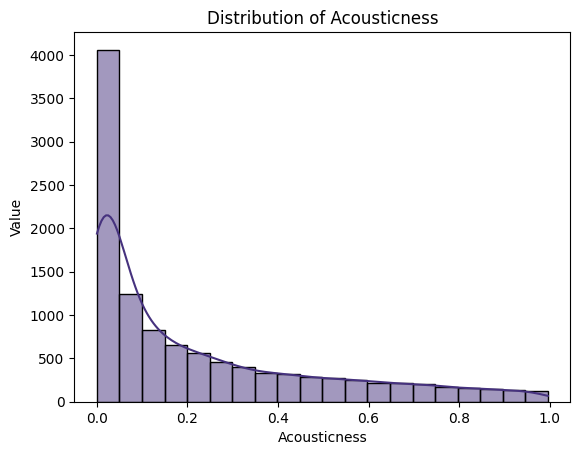

In [8]:
sns.set_palette('viridis')
sns.histplot(df['acousticness'], kde=True, bins=20) 
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Value')
plt.show()

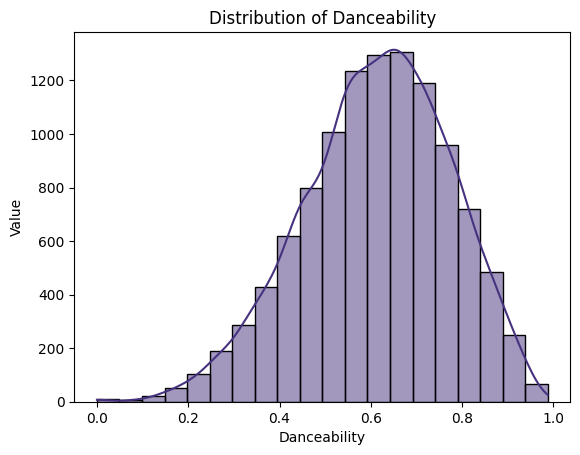

In [9]:
sns.set_palette('viridis')
sns.histplot(df['danceability'], kde=True, bins=20) 
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Value')
plt.show()

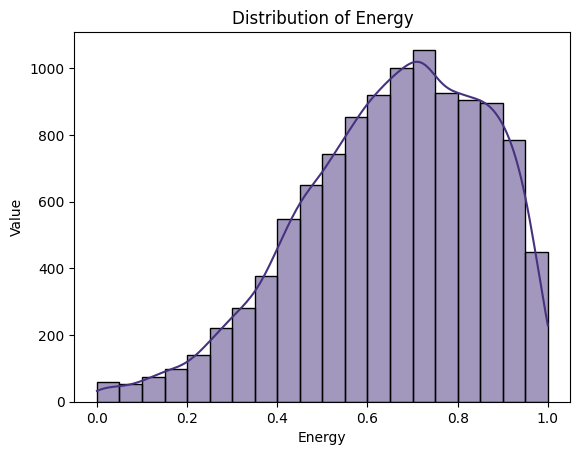

In [10]:
sns.set_palette('viridis')
sns.histplot(df['energy'], kde=True, bins=20) 
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Value')
plt.show()

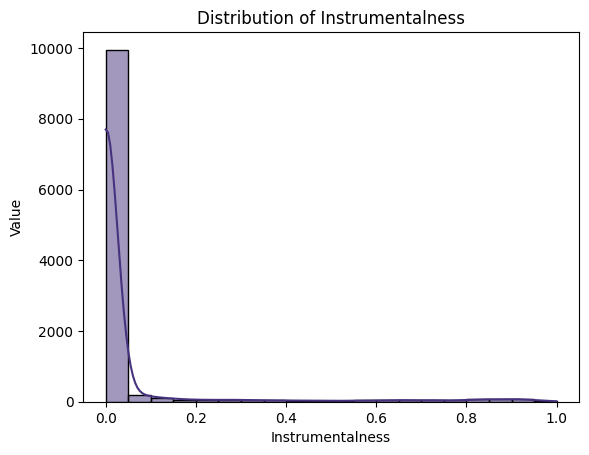

In [11]:
sns.set_palette('viridis')
sns.histplot(df['instrumentalness'], kde=True, bins=20) 
plt.title('Distribution of Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Value')
plt.show()

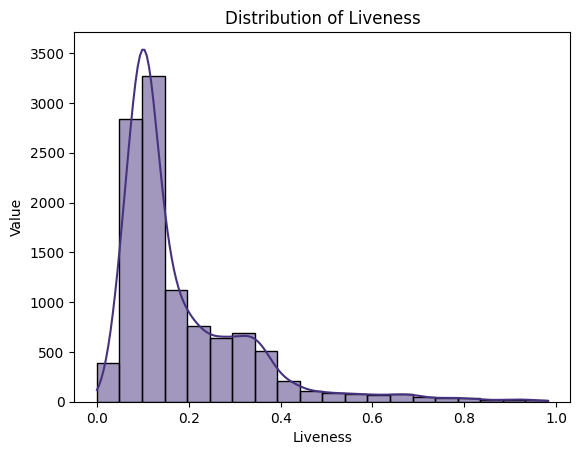

In [12]:
sns.set_palette('viridis')
sns.histplot(df['liveness'], kde=True, bins=20) 
plt.title('Distribution of Liveness')
plt.xlabel('Liveness')
plt.ylabel('Value')
plt.show()

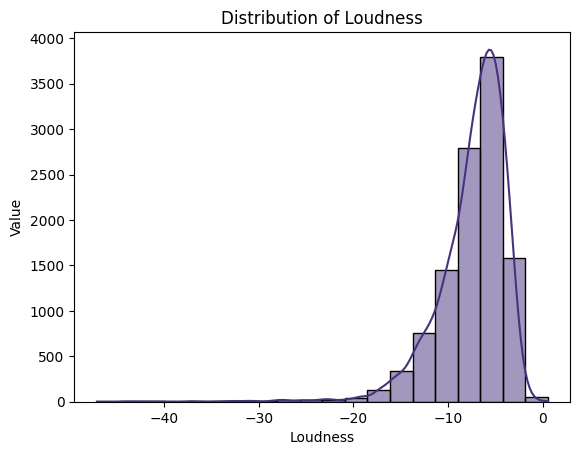

In [13]:
sns.set_palette('viridis')
sns.histplot(df['loudness'], kde=True, bins=20) 
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.ylabel('Value')
plt.show()

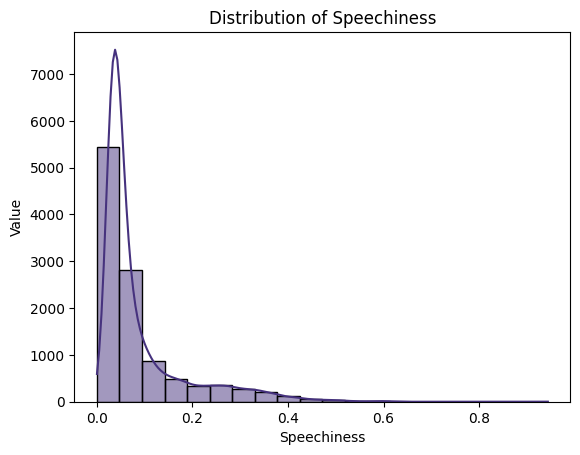

In [14]:
sns.set_palette('viridis')
sns.histplot(df['speechiness'], kde=True, bins=20) 
plt.title('Distribution of Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Value')
plt.show()

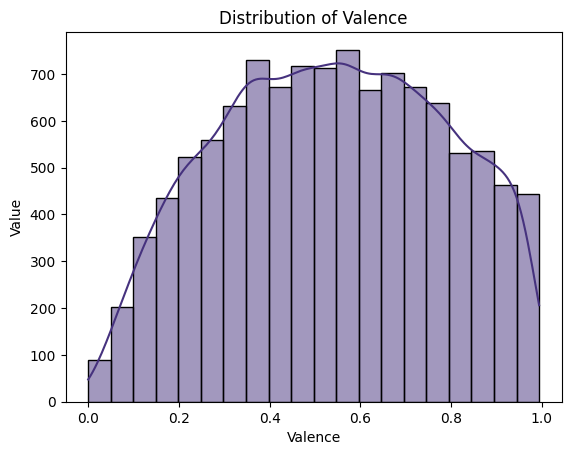

In [15]:
sns.set_palette('viridis')
sns.histplot(df['valence'], kde=True, bins=20) 
plt.title('Distribution of Valence')
plt.xlabel('Valence')
plt.ylabel('Value')
plt.show()

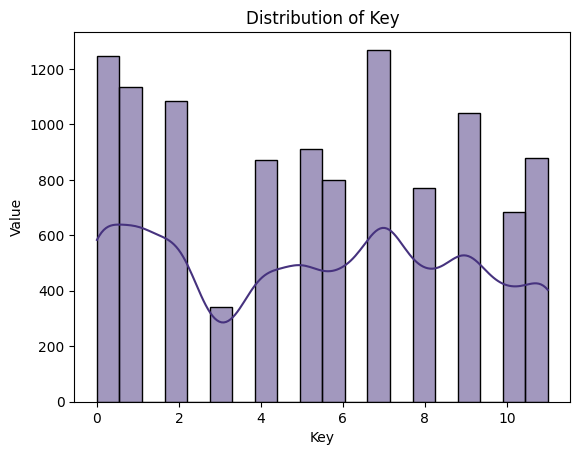

In [16]:
sns.set_palette('viridis')
sns.histplot(df['key'], kde=True, bins=20) 
plt.title('Distribution of Key')
plt.xlabel('Key')
plt.ylabel('Value')
plt.show()

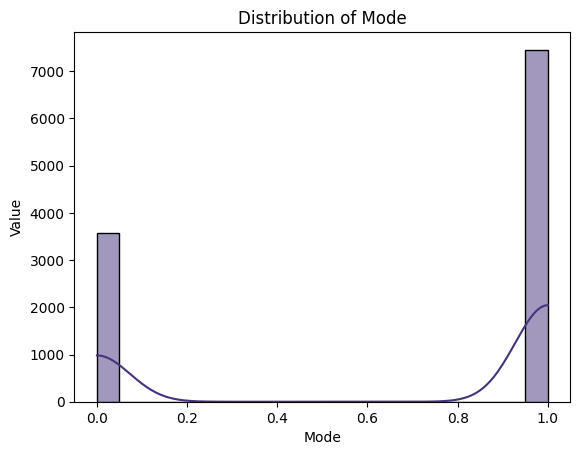

In [17]:
sns.set_palette('viridis')
sns.histplot(df['mode'], kde=True, bins=20) 
plt.title('Distribution of Mode')
plt.xlabel('Mode')
plt.ylabel('Value')
plt.show()

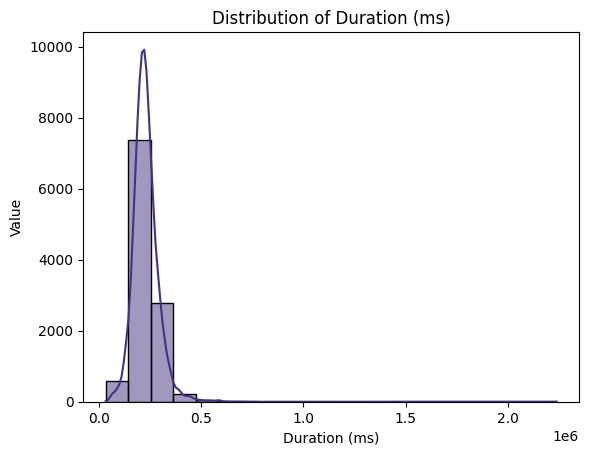

In [18]:
sns.set_palette('viridis')
sns.histplot(df['duration_ms'], kde=True, bins=20) 
plt.title('Distribution of Duration (ms)')
plt.xlabel('Duration (ms)')
plt.ylabel('Value')
plt.show()

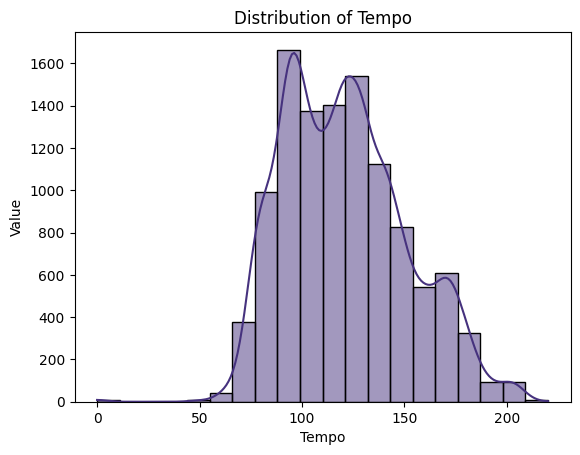

In [19]:
sns.set_palette('viridis')
sns.histplot(df['tempo'], kde=True, bins=20) 
plt.title('Distribution of Tempo')
plt.xlabel('Tempo')
plt.ylabel('Value')
plt.show()

**🔍 Interpretation of Results: **

Danceability: The danceability seems to be slightly left-skewed. A large number of songs have a danceability between 0.6 and 0.65, which falls within the higher range of danceability. 

Energy: The energy of songs appears to be more strongly left-skewed. A large number of songs fall between 0.65 and 0.8. 

Instrumentalness: The distribution of Instrumentalness is extremely right-skewed. Most songs fall between 0.0 and 0.1. 

Liveness: This feature is heavily right-skewed. Most songs have a low liveness, between 0.1 and 0.15. 

Loudness: The distribution of Loudness appears to be left-skewed. Most songs fall baetween -10 and -5. 

Speechiness: This feature appears to be very right-skewed. Most songs fall between 0.1 and 0.15. Valence: This feature is somewhat normally distributed. 

Key: This feature is somewhat uniformly distributed, but in general, there does not seem to be any relationship. 

Mode: There does not appear to be any relationship. 

Duration: This feature appears to be right-skewed, with most songs around 0.25. 

Tempo: This feature appears slightly bimodal, with a dip at around 110.

### Bivariate Analysis

##### Acousticness

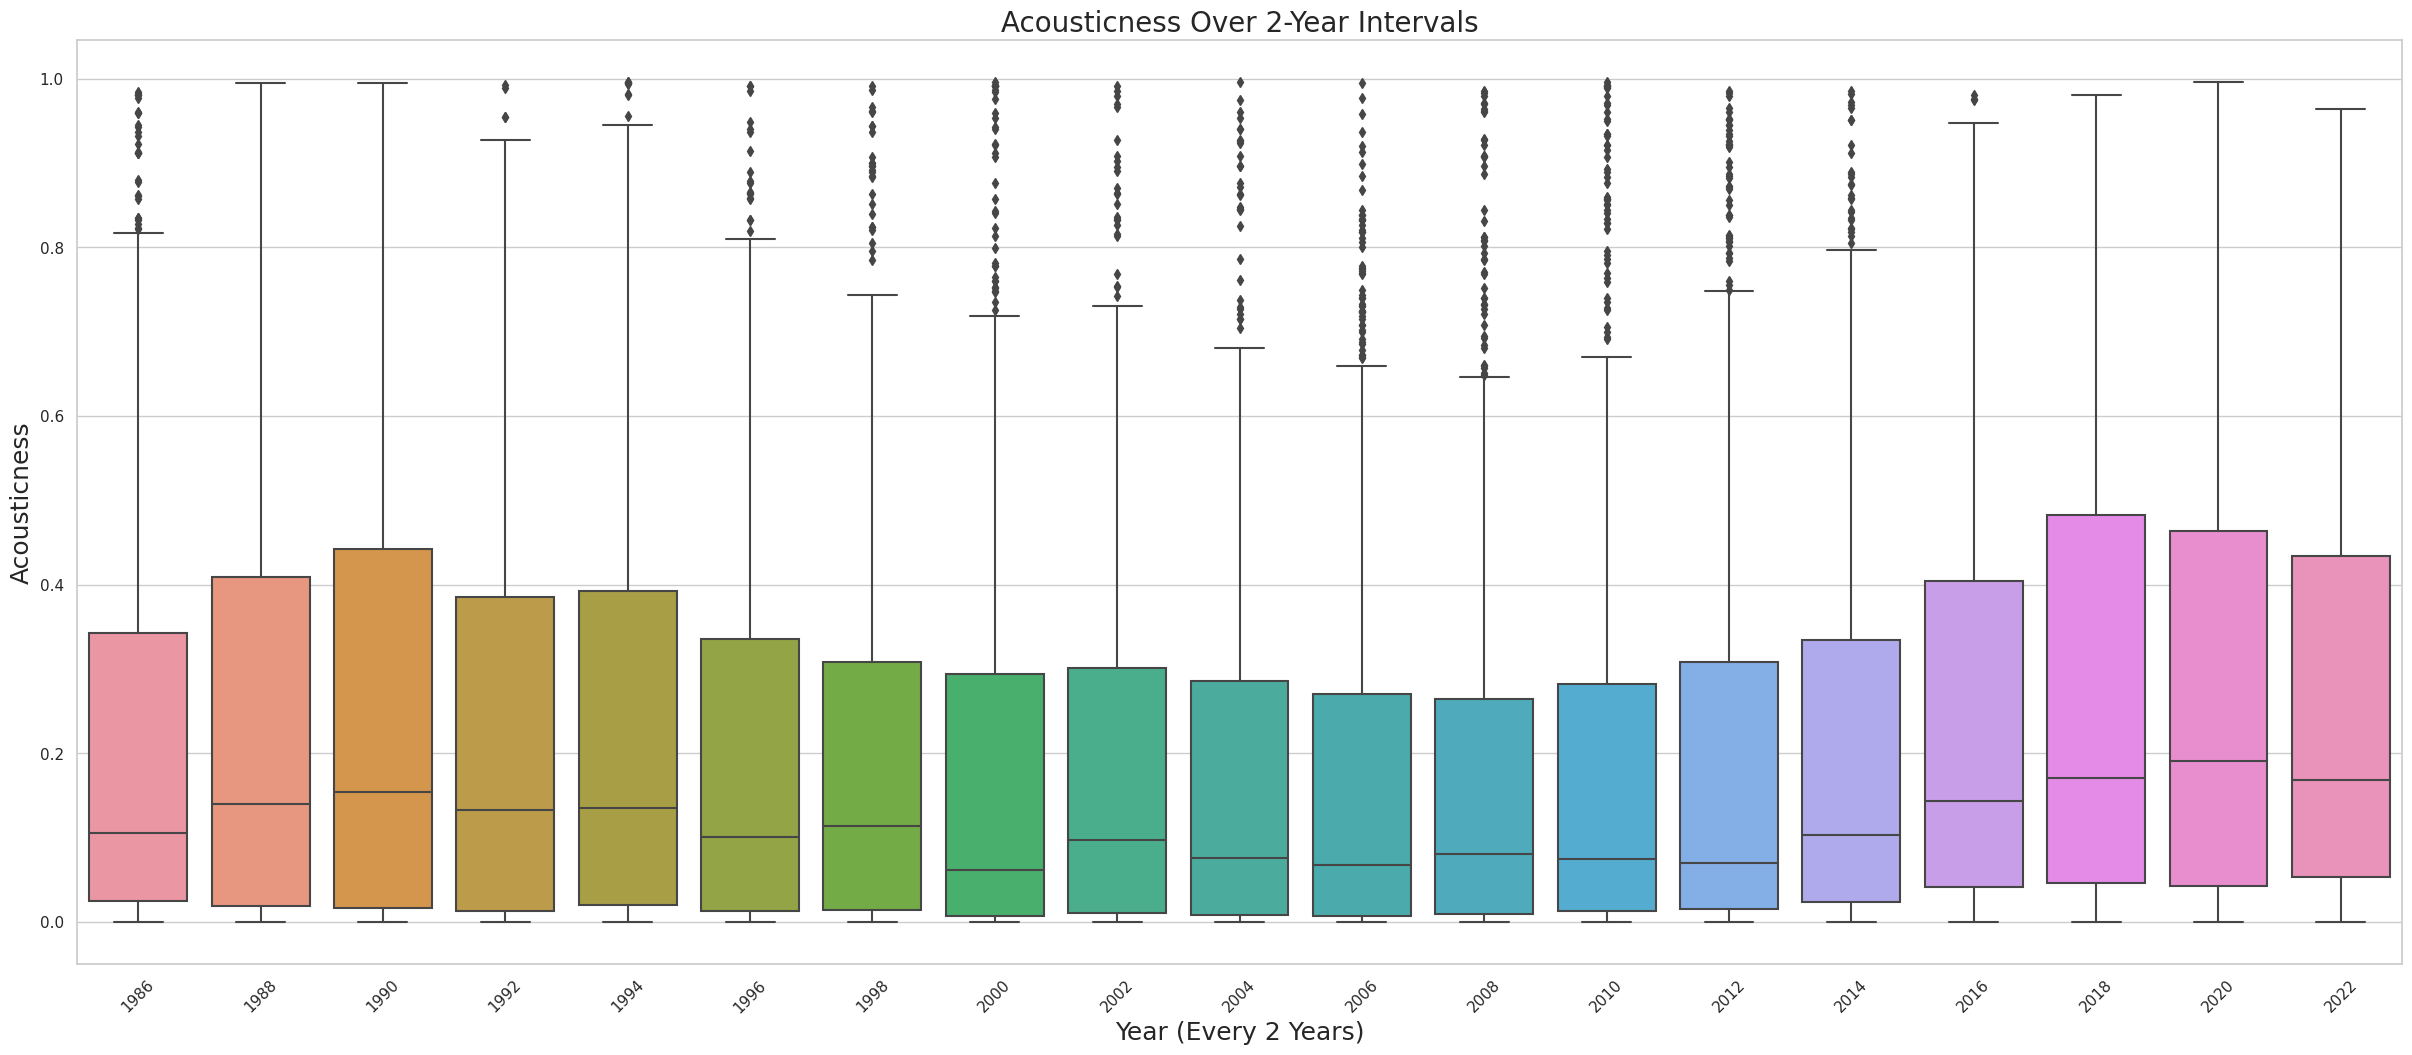

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="acousticness", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Acousticness", size=18)
plt.title('Acousticness Over 2-Year Intervals', size=20)
plt.show()

##### Danceability

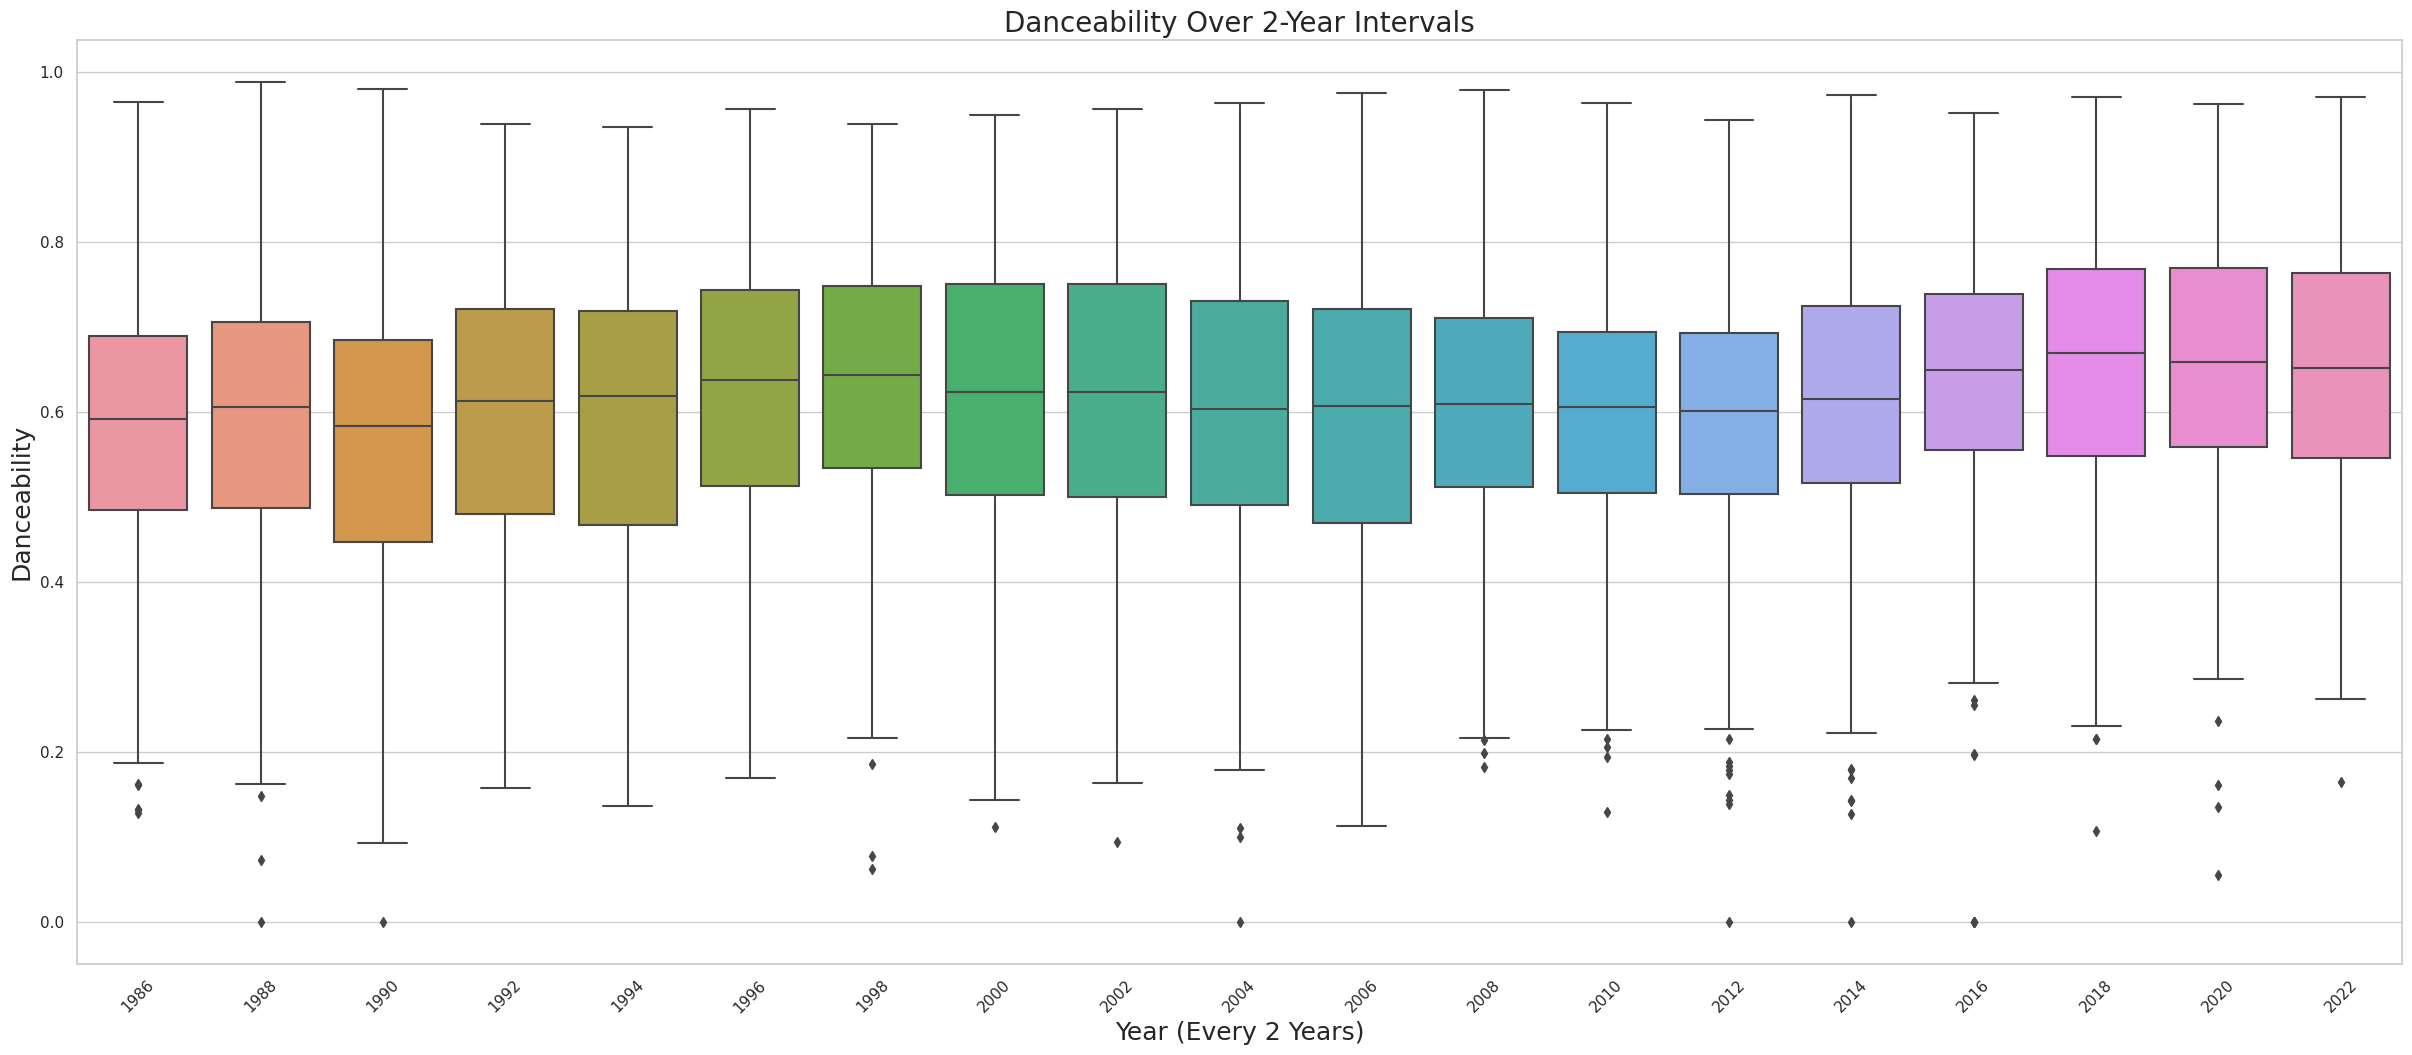

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="danceability", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Danceability", size=18)
plt.title('Danceability Over 2-Year Intervals', size=20)
plt.show()

##### Energy

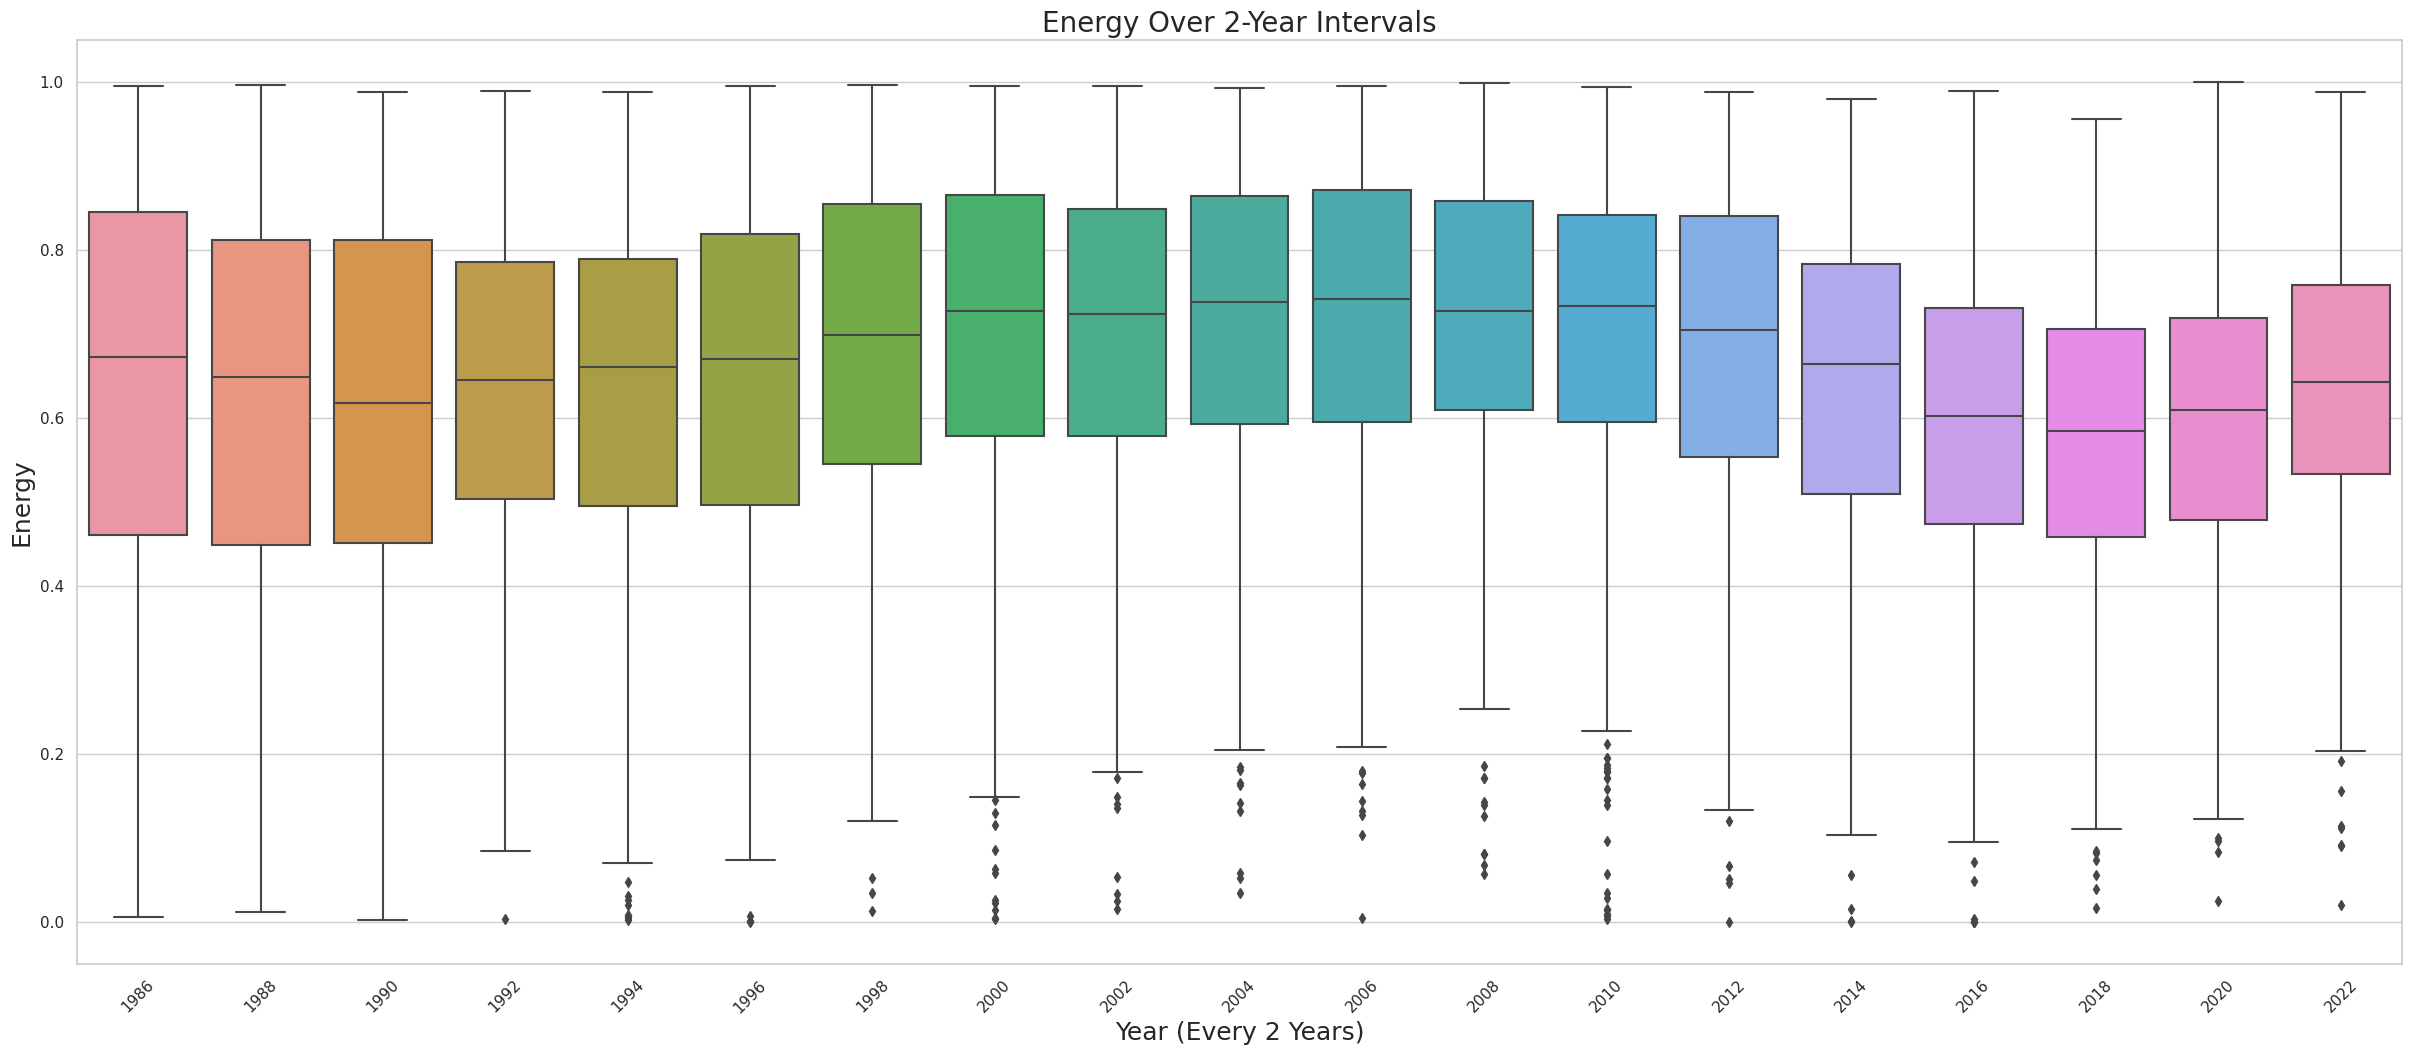

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="energy", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Energy", size=18)
plt.title('Energy Over 2-Year Intervals', size=20)
plt.show()

##### Instrumentalness

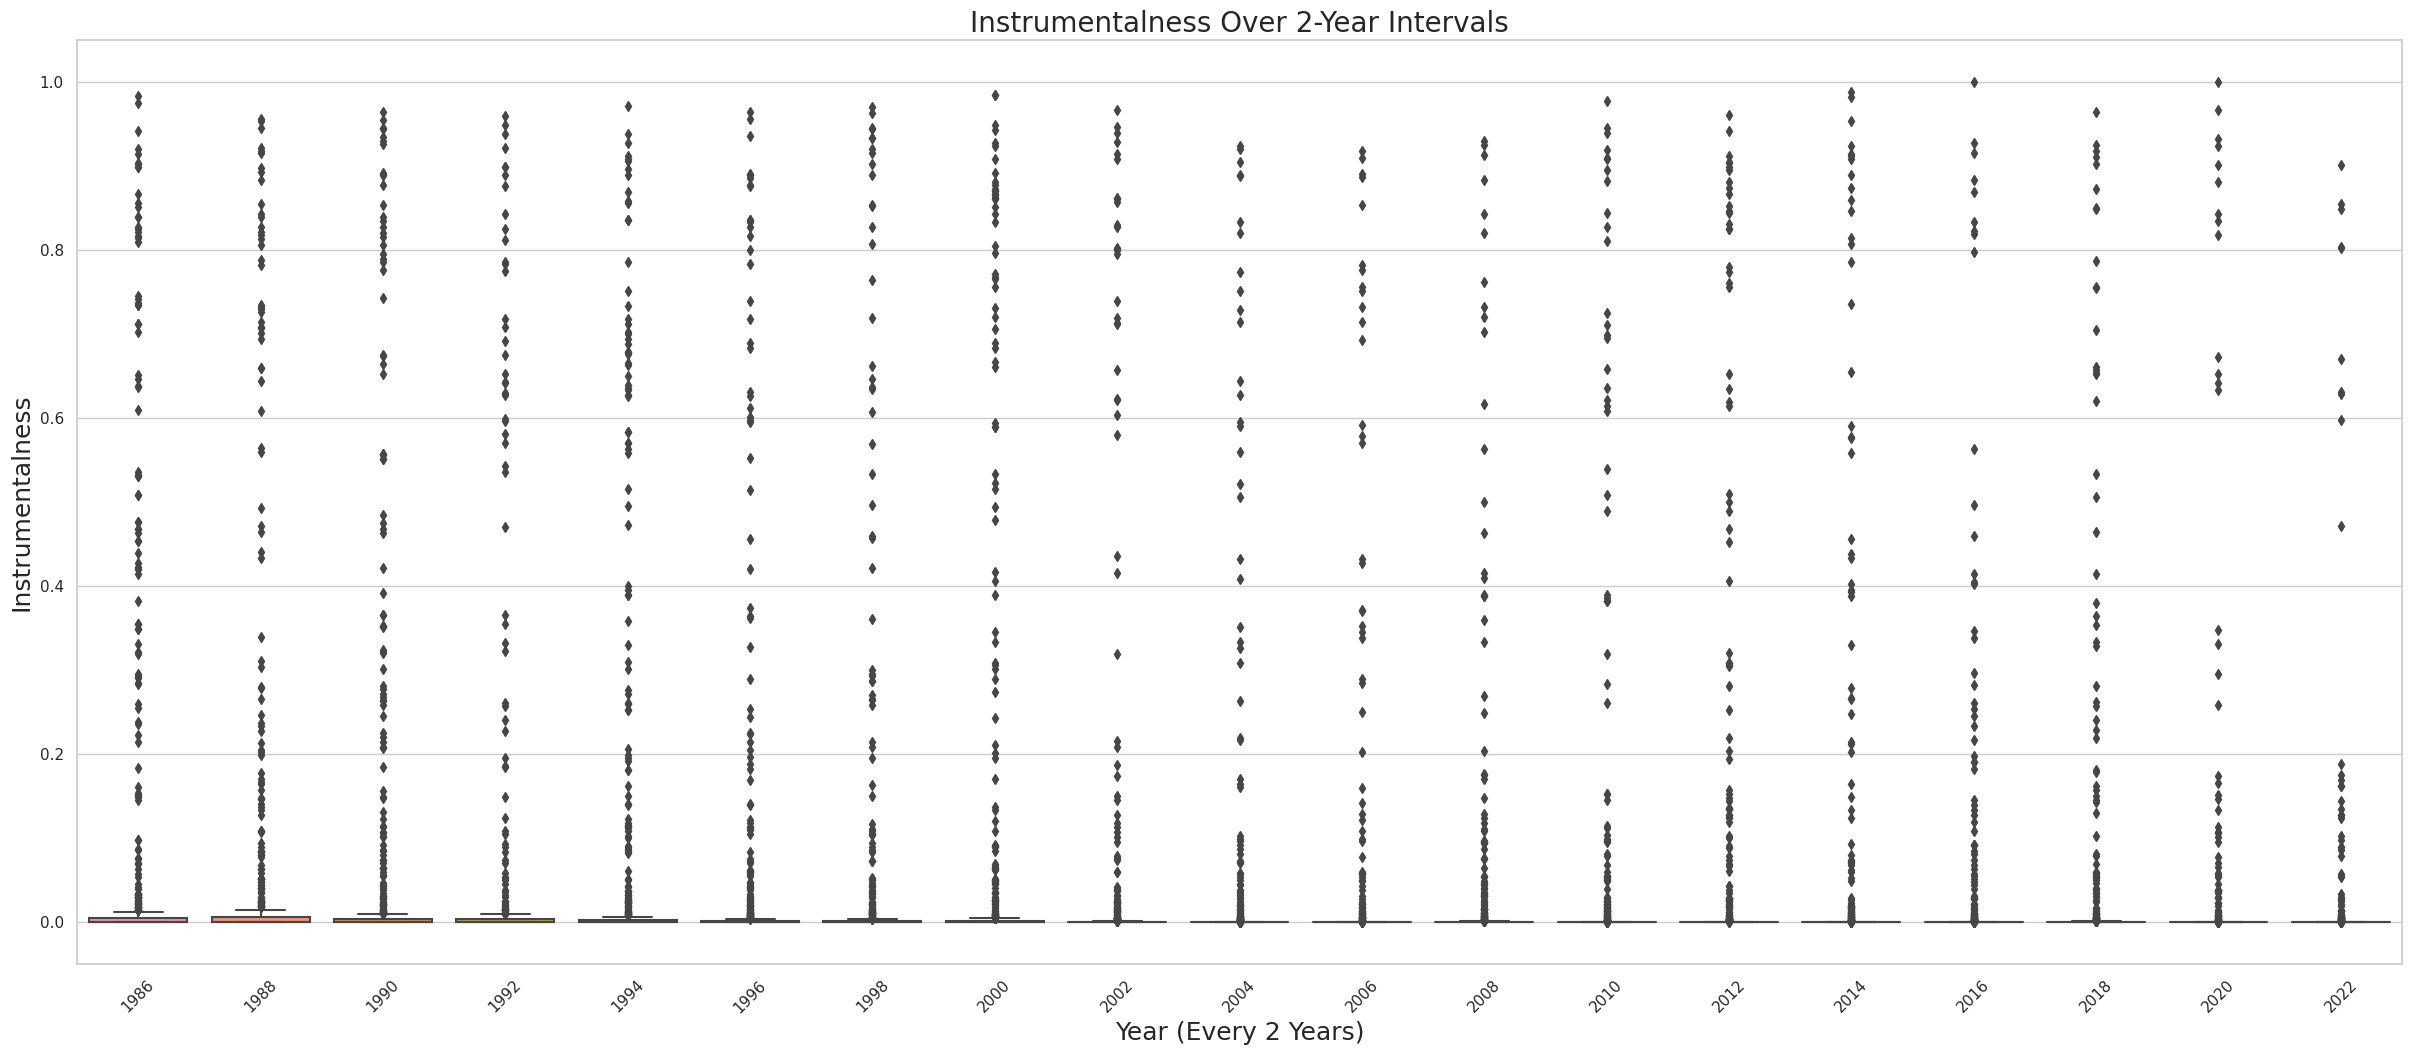

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="instrumentalness", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Instrumentalness", size=18)
plt.title('Instrumentalness Over 2-Year Intervals', size=20)
plt.show()

##### Liveness

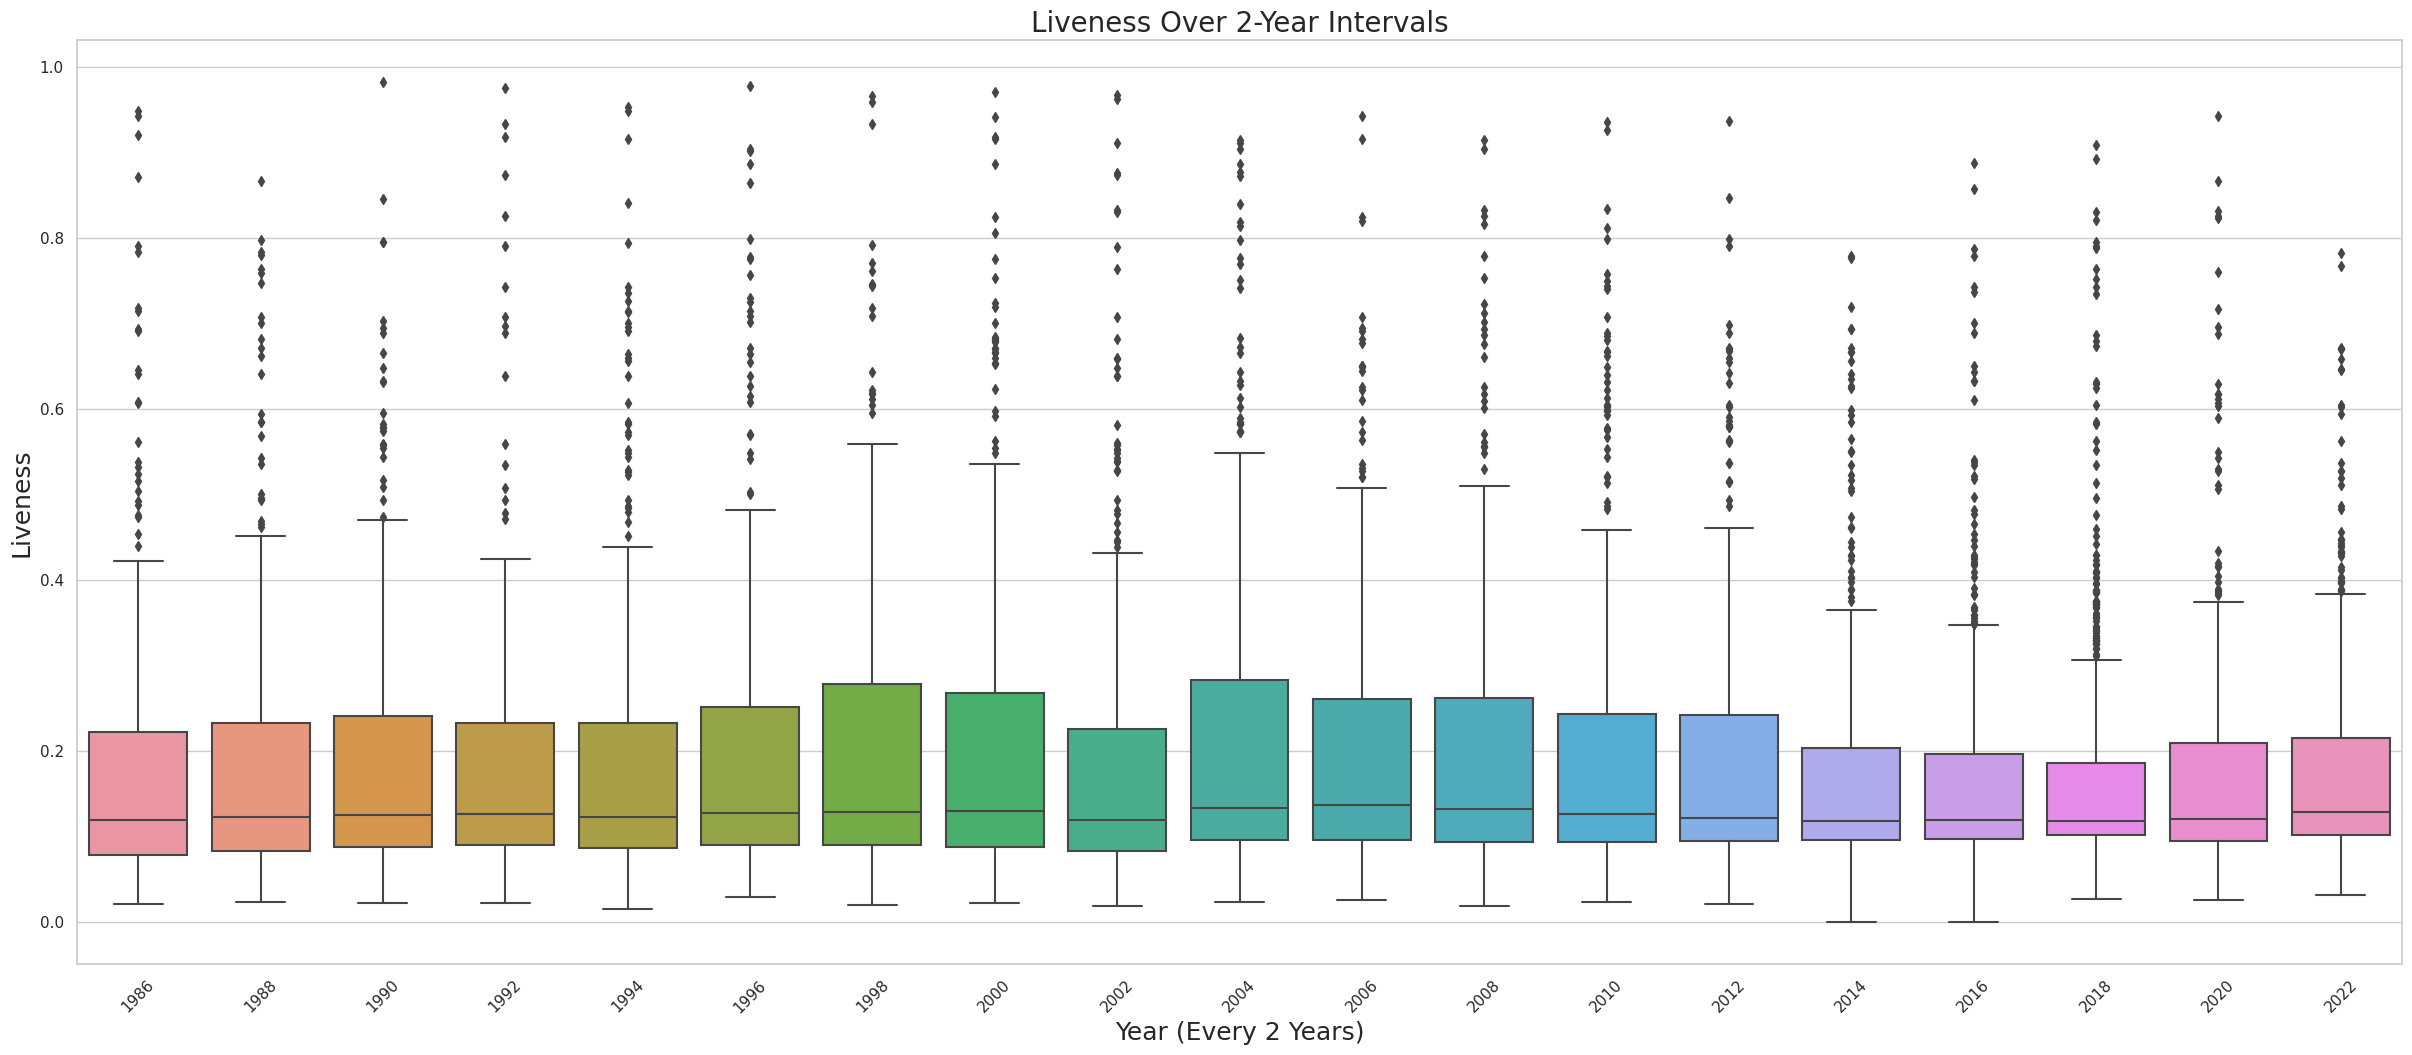

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="liveness", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Liveness", size=18)
plt.title('Liveness Over 2-Year Intervals', size=20)
plt.show()

##### Loudness

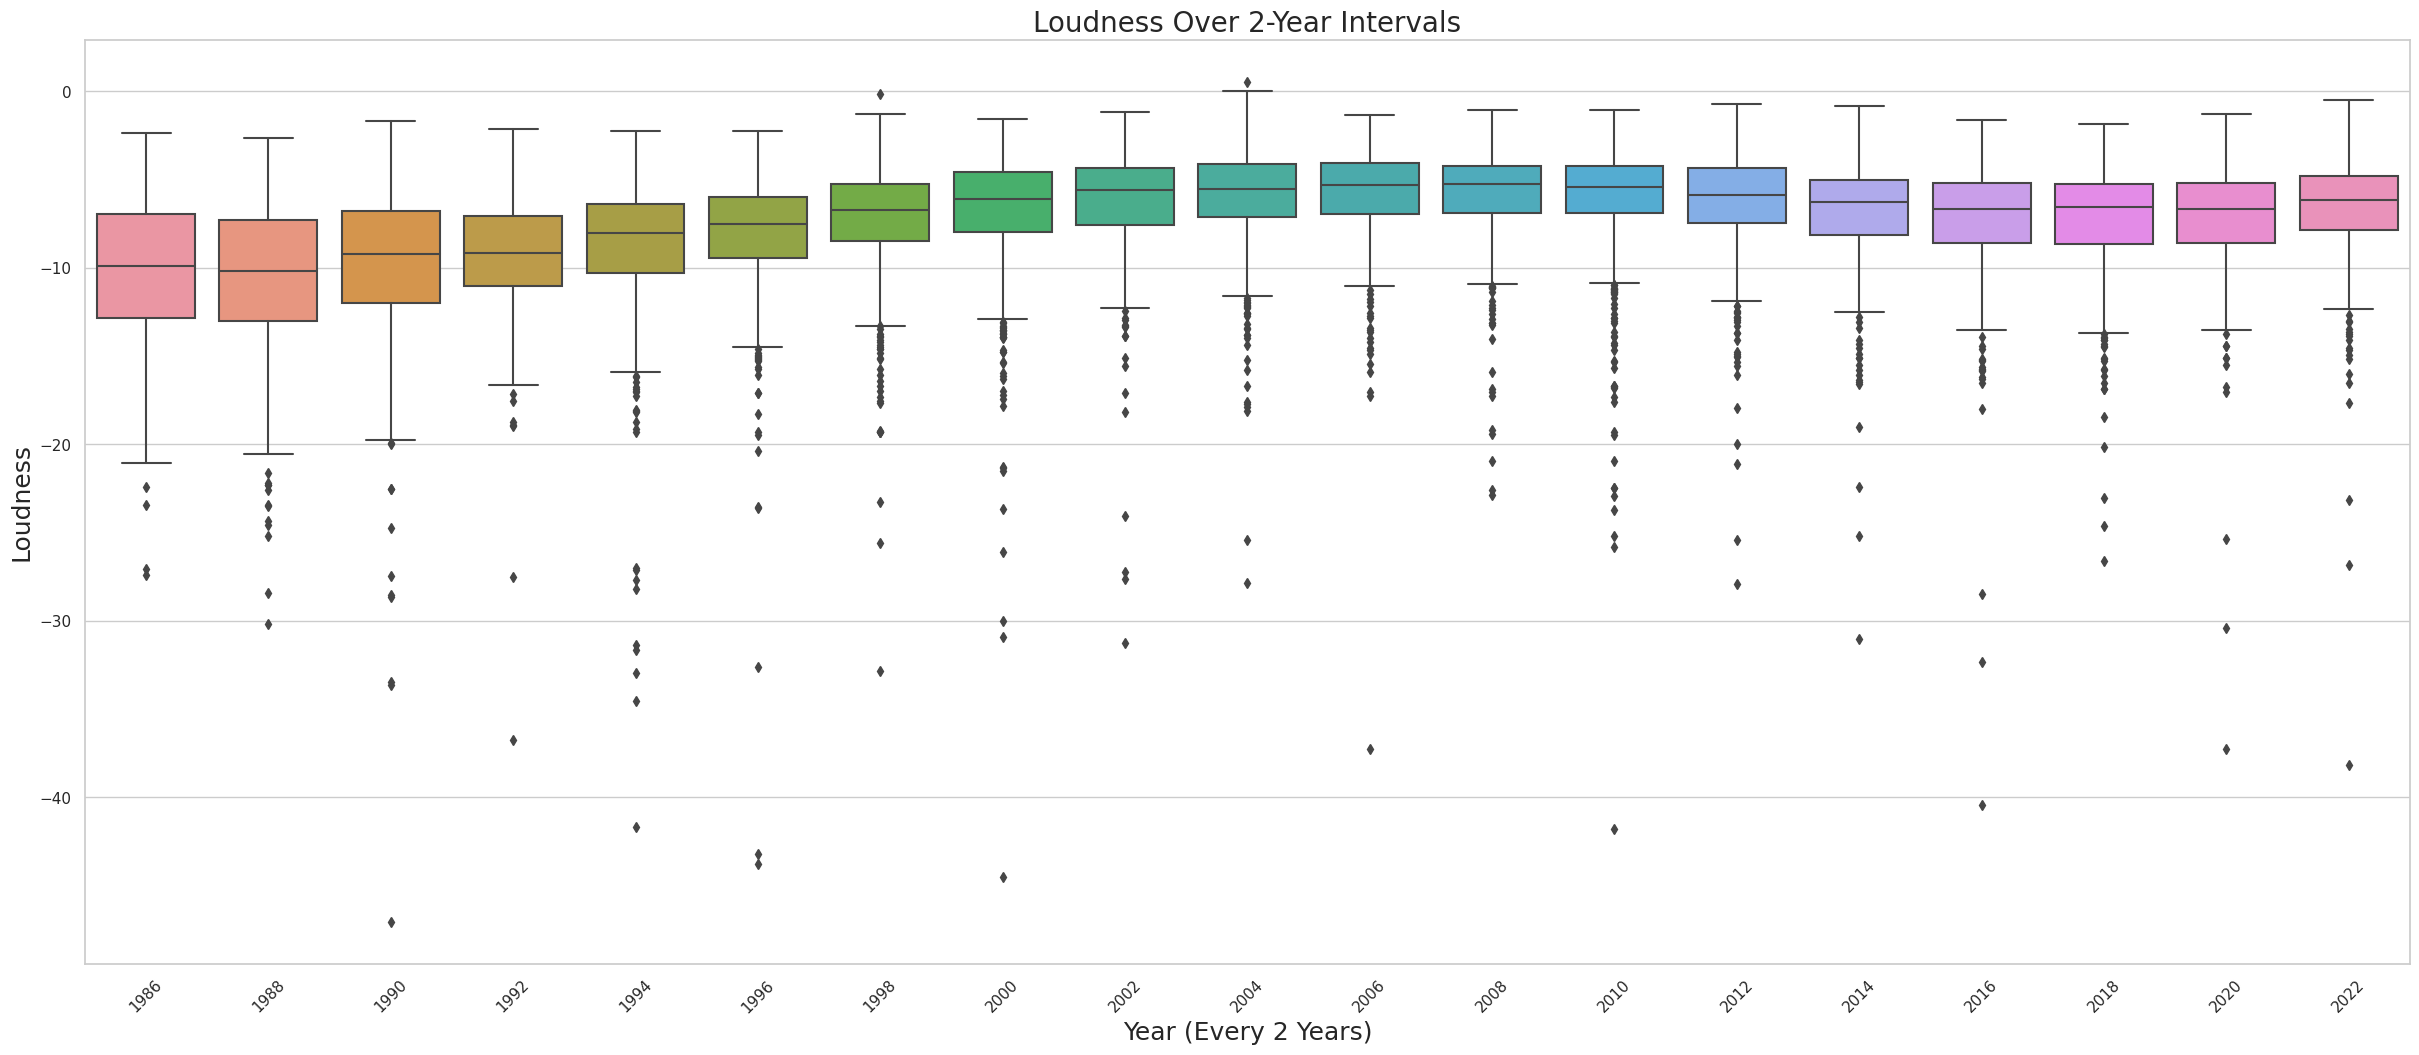

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="loudness", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Loudness", size=18)
plt.title('Loudness Over 2-Year Intervals', size=20)
plt.show()

##### Speechiness

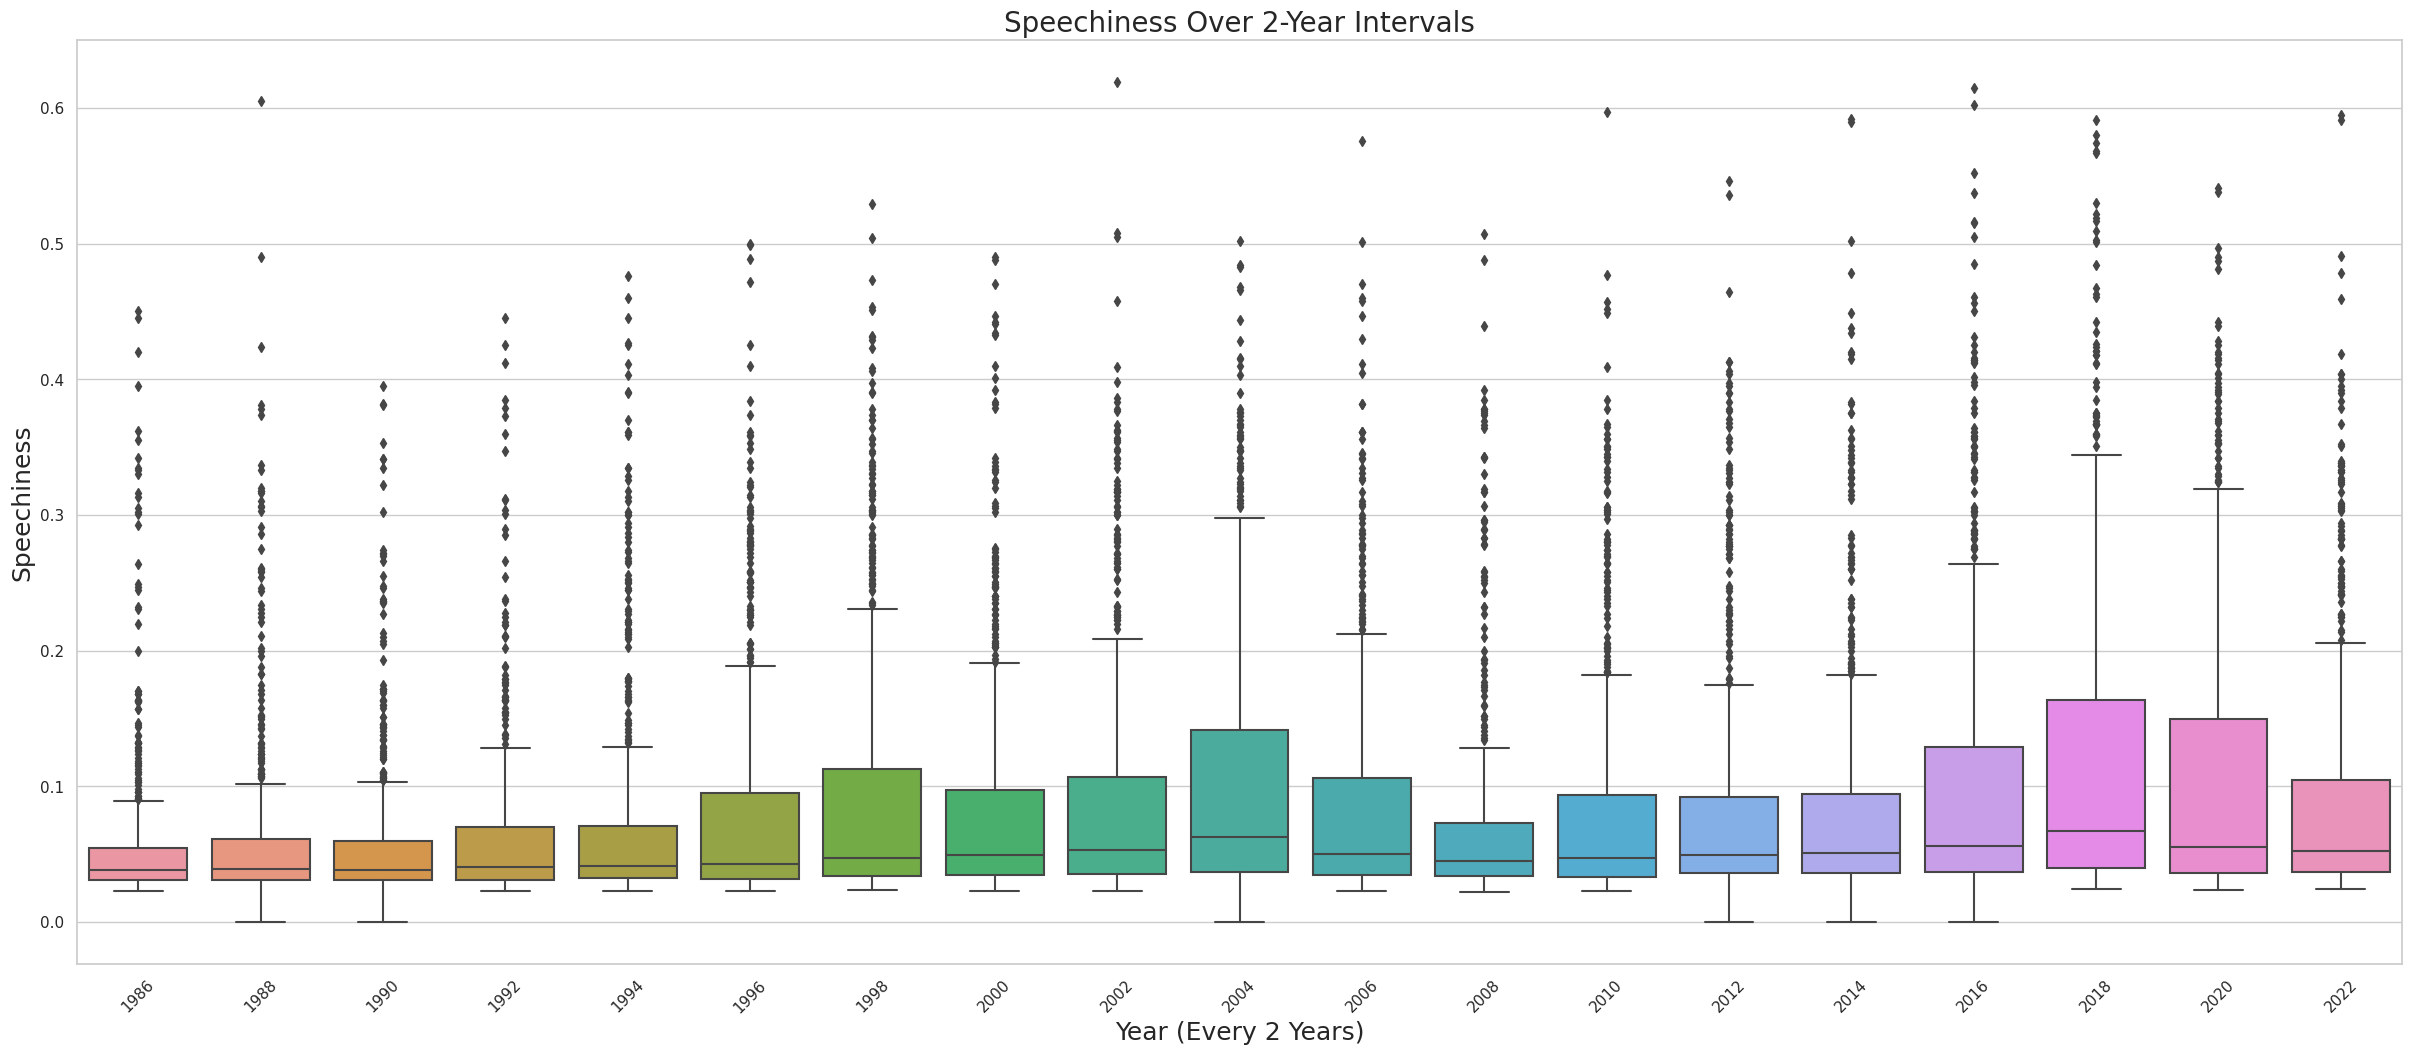

In [26]:
df2 = df[df.speechiness < 0.66]

sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df2['year'] // 2 * 2, y="speechiness", data=df2)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Speechiness", size=18)
plt.title('Speechiness Over 2-Year Intervals', size=20)
plt.show()

##### Valence

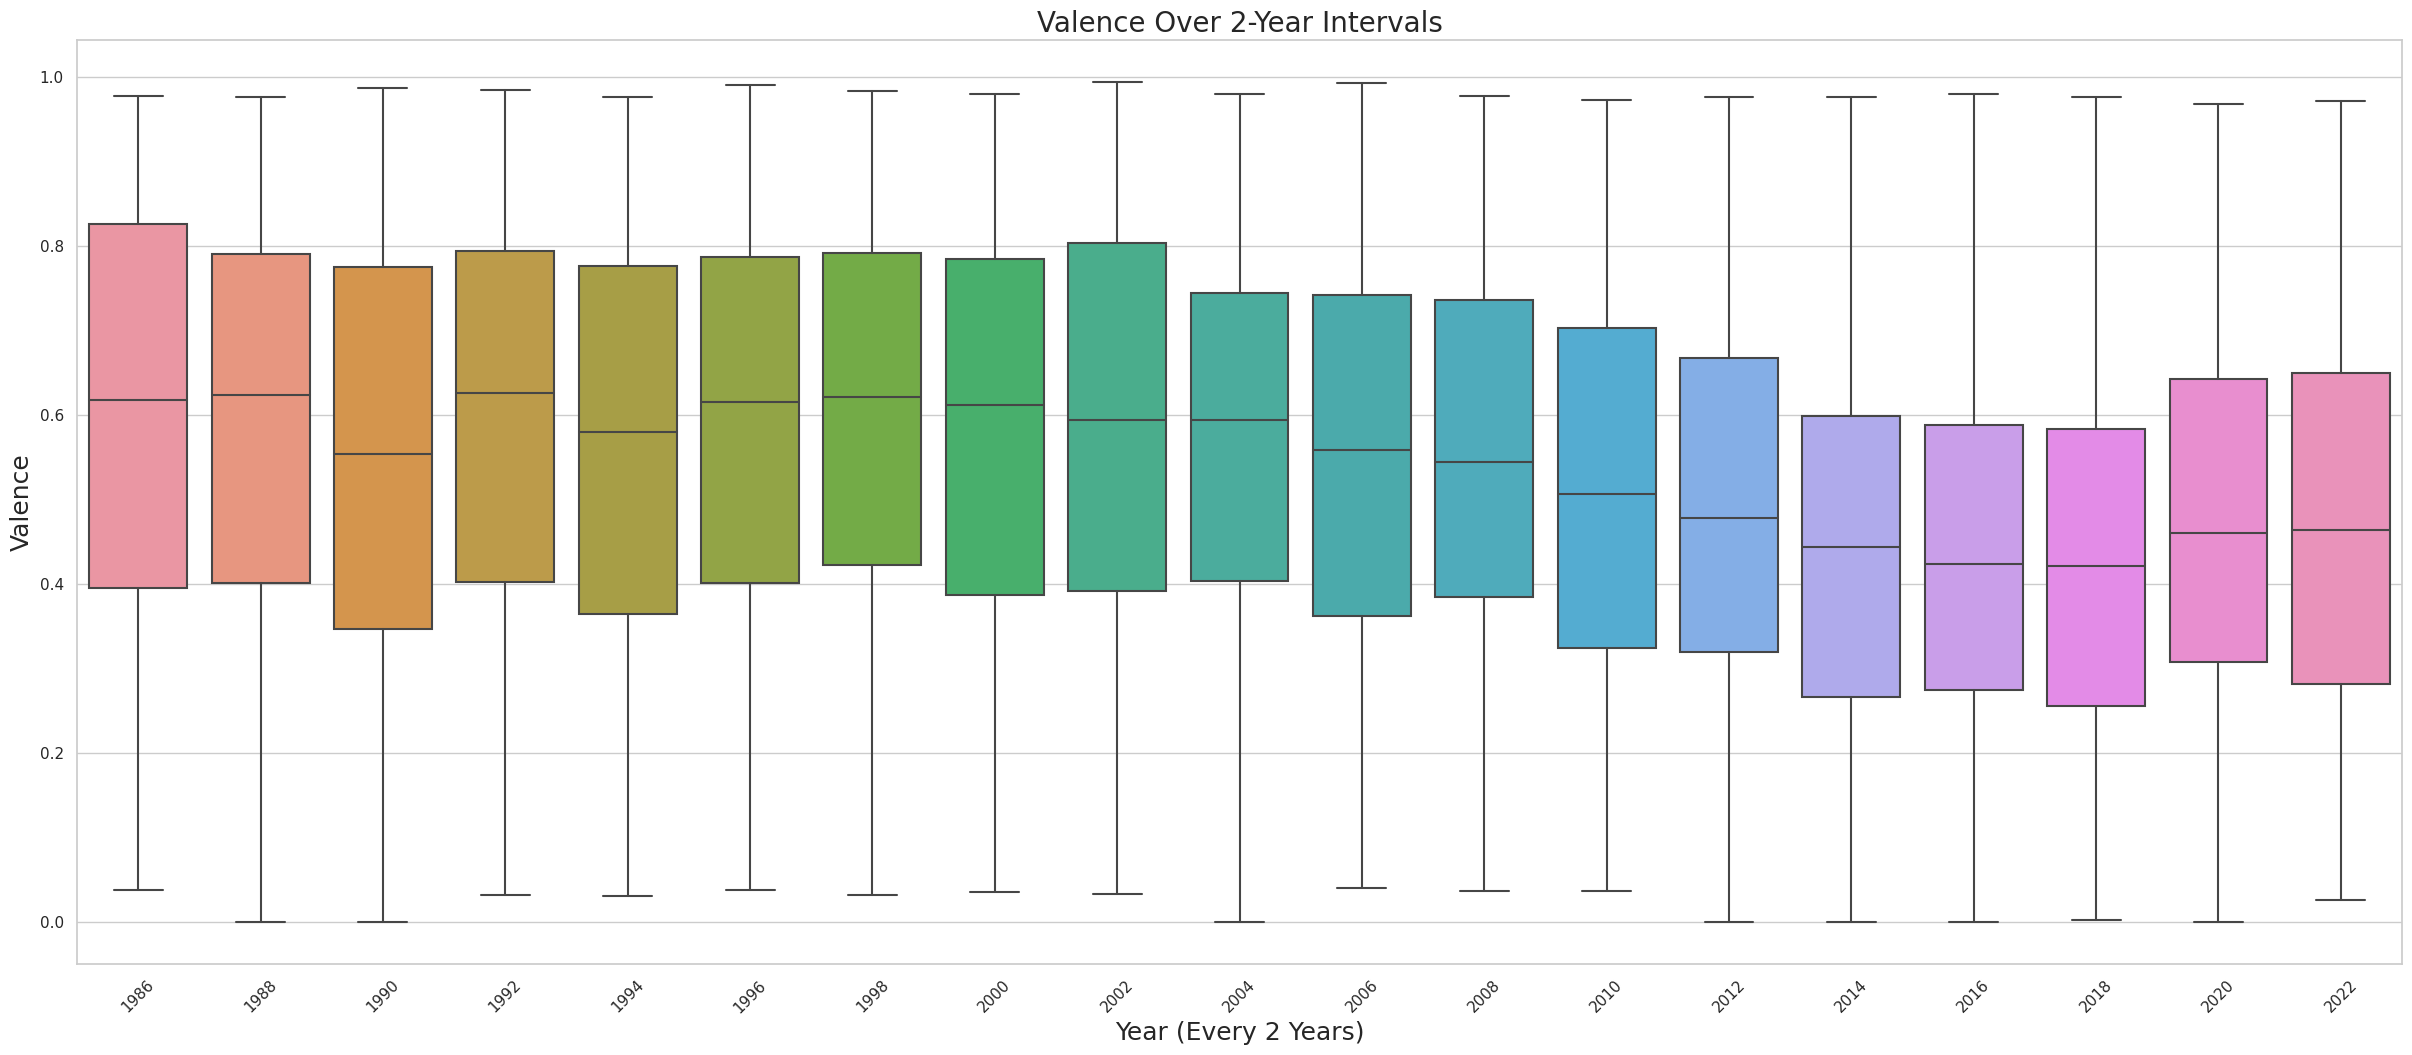

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="valence", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Valence", size=18)
plt.title('Valence Over 2-Year Intervals', size=20)
plt.show()

##### Key

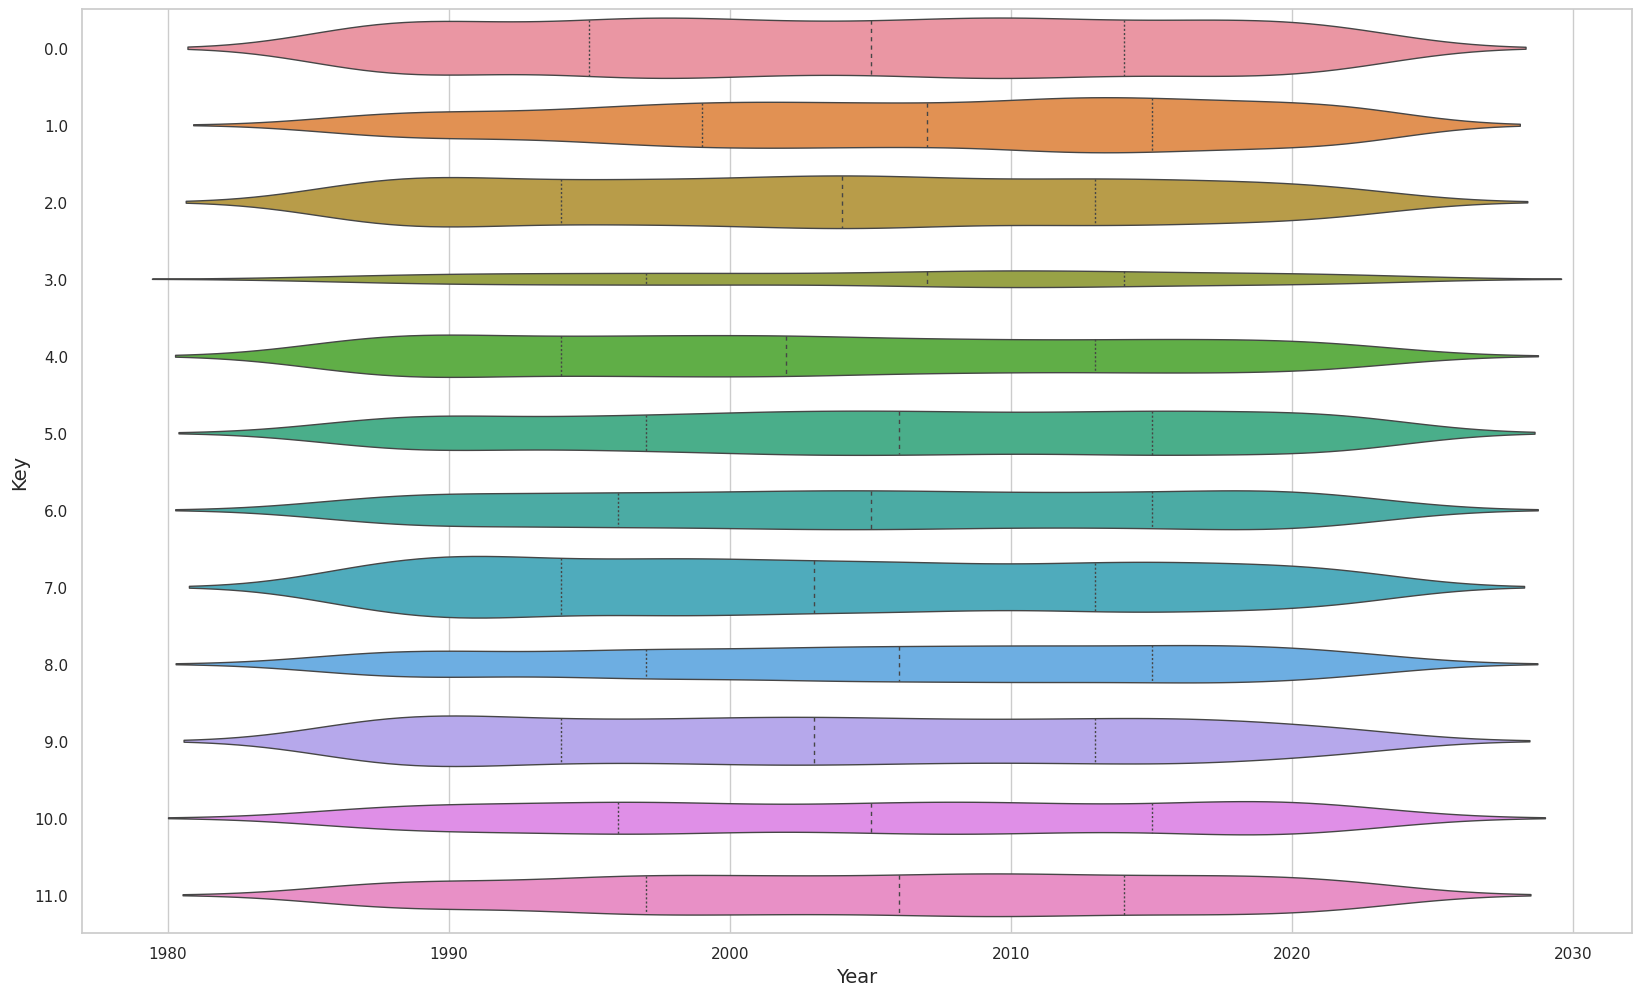

In [28]:
df['key'] = df['key'].astype('category')

# Set the style of the visualization
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Create a violin plot using Seaborn
sns.violinplot(data=df, x="year", y="key",
               split=True, inner="quart", linewidth=1, orient="h", scale='count')

# Set labels and title
plt.xlabel("Year", size=14)
plt.ylabel("Key", size=14)

# Show the plot
plt.show()

##### Mode

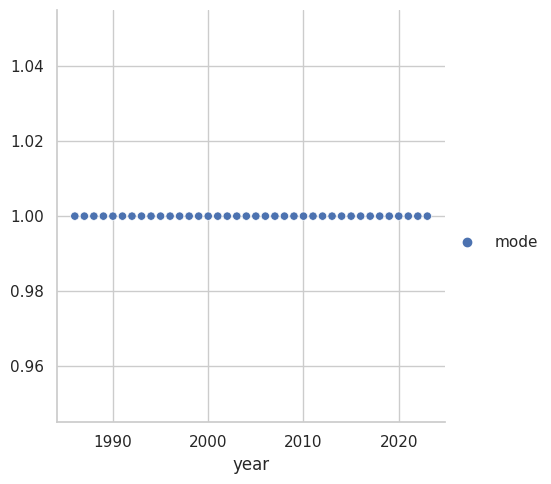

In [29]:
yrly_modality_mode = df.groupby('year').apply(lambda x: x['mode'].value_counts().idxmax()).to_frame(name='mode')
sns.relplot(data=yrly_modality_mode);

##### Duration

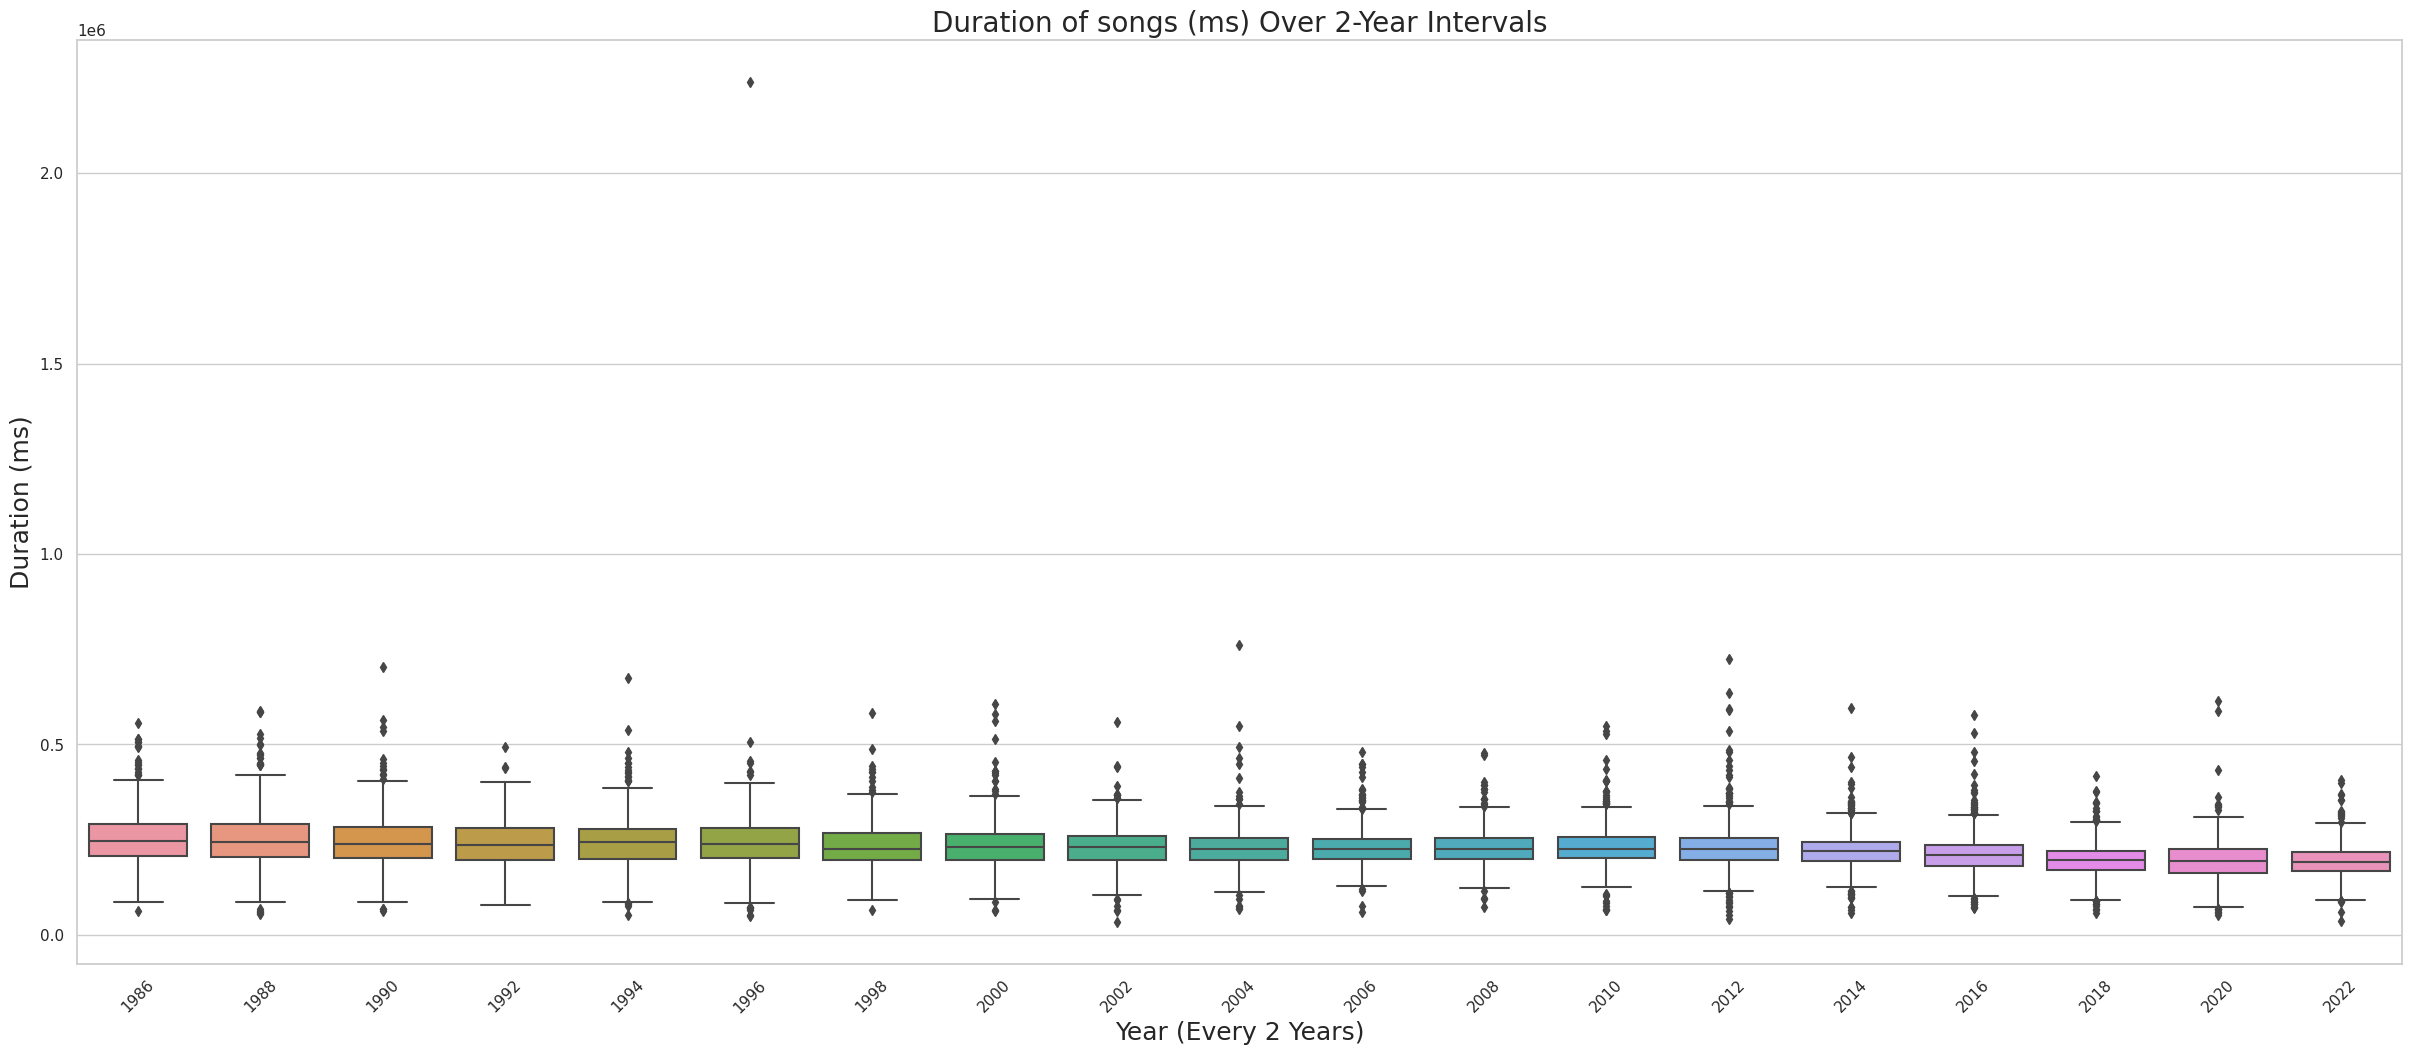

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="duration_ms", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Duration (ms)", size=18)
plt.title('Duration of songs (ms) Over 2-Year Intervals', size=20)
plt.show()

##### Tempo

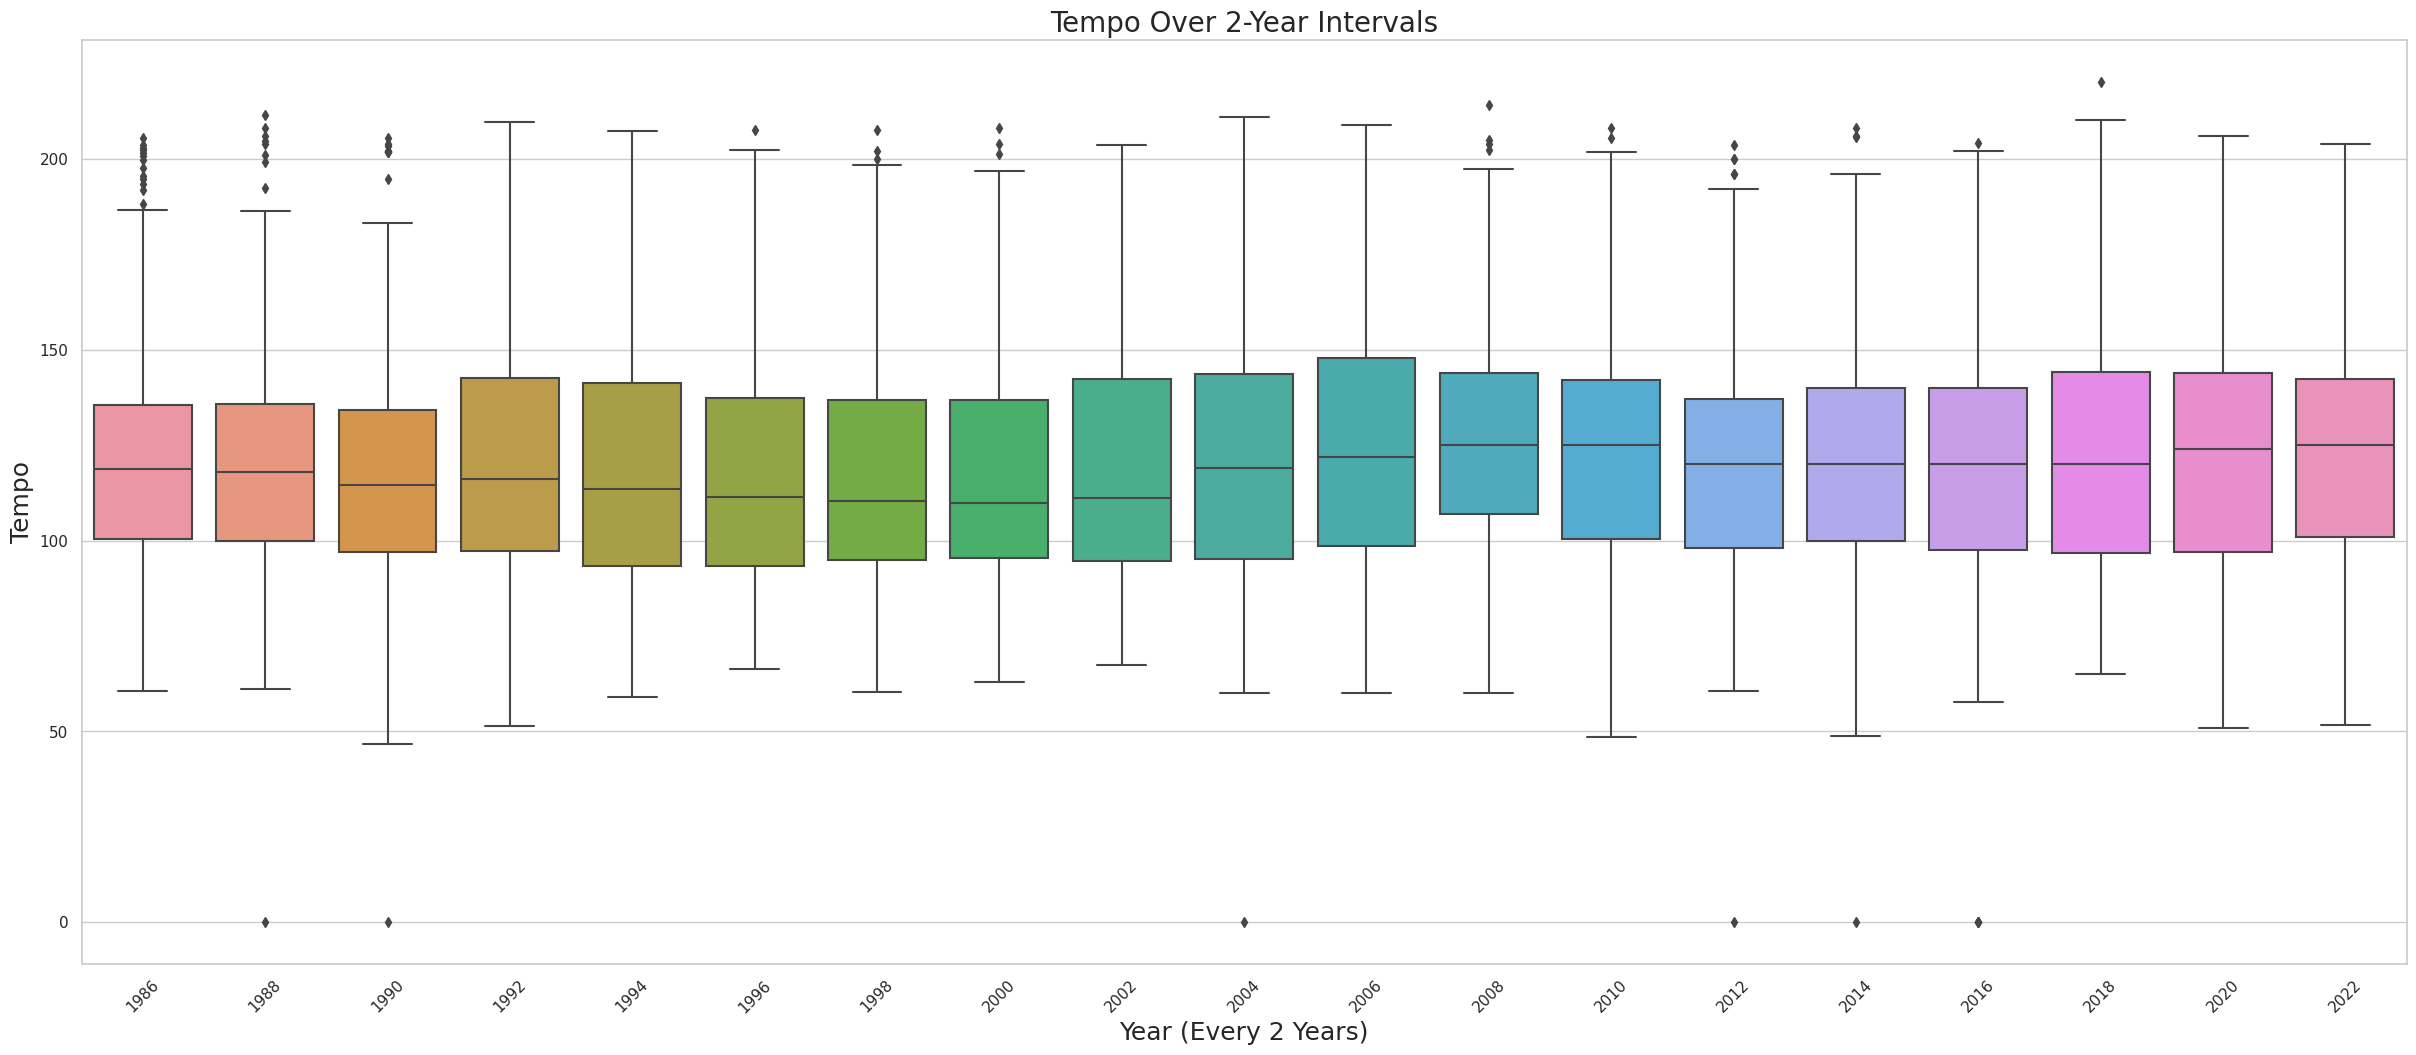

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 12))
plt.xticks(rotation=45)
sns.boxplot(x=df['year'] // 2 * 2, y="tempo", data=df)

plt.xlabel("Year (Every 2 Years)", size=18)
plt.ylabel("Tempo", size=18)
plt.title('Tempo Over 2-Year Intervals', size=20)
plt.show()

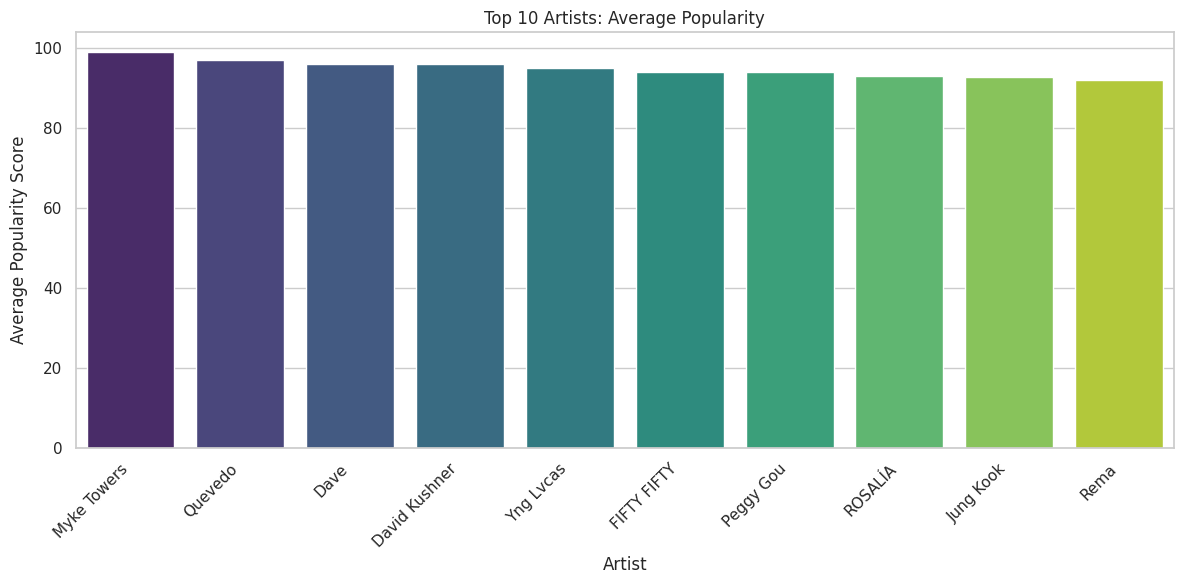

In [32]:
average_popularity_per_artist = df.groupby('principal_artist_name')['popularity'].mean().reset_index()

# 2. Pick the top 10 artists with the highest average popularity score
top10_artists = average_popularity_per_artist.nlargest(10, 'popularity')

# 3. Create a bar chart with different colors using Seaborn
plt.figure(figsize=(12, 6))
custom_colors = sns.color_palette("viridis", n_colors=len(top10_artists))
sns.barplot(x='principal_artist_name', y='popularity', data=top10_artists, palette=custom_colors)
plt.title('Top 10 Artists: Average Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()

# 4. Show the chart
plt.show()

<Figure size 800x500 with 0 Axes>

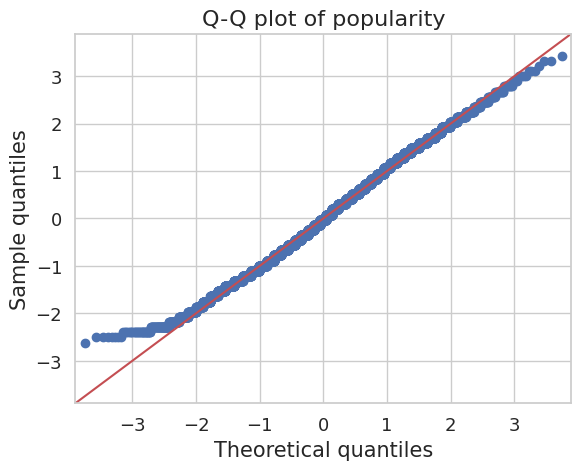

<Figure size 800x500 with 0 Axes>

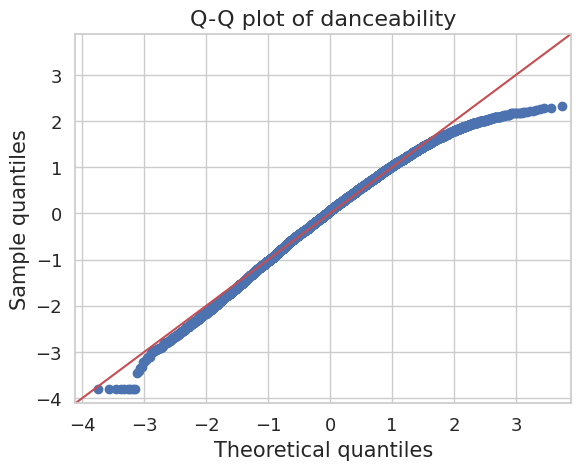

<Figure size 800x500 with 0 Axes>

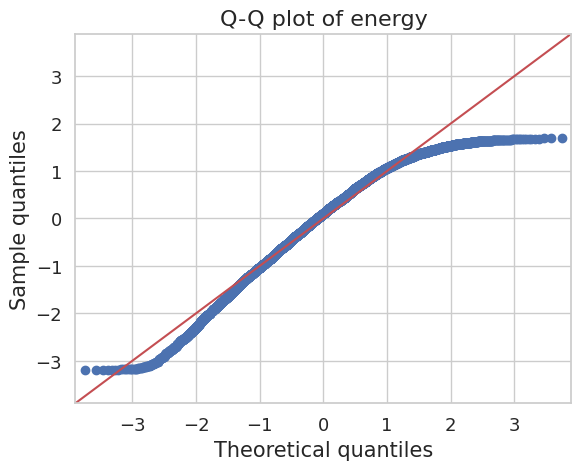

<Figure size 800x500 with 0 Axes>

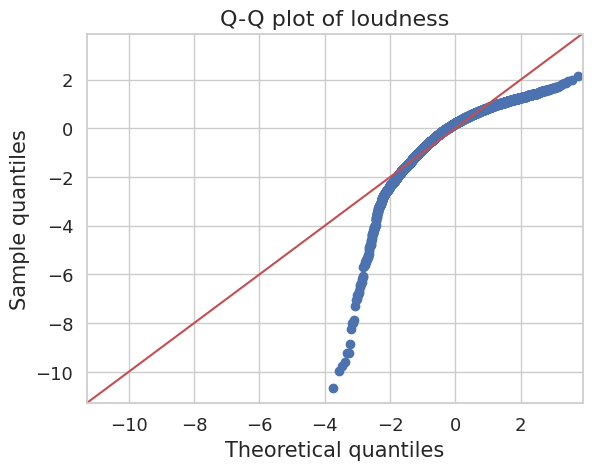

<Figure size 800x500 with 0 Axes>

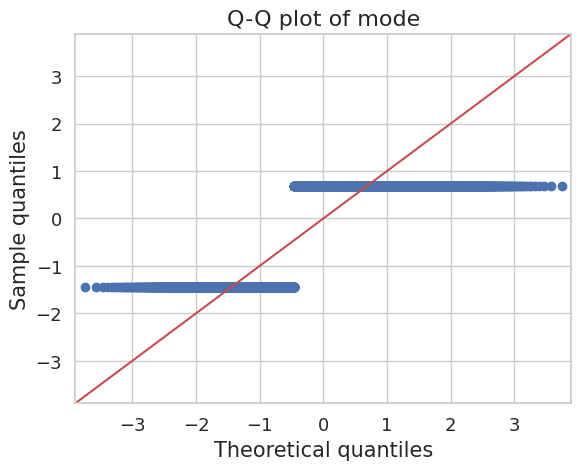

<Figure size 800x500 with 0 Axes>

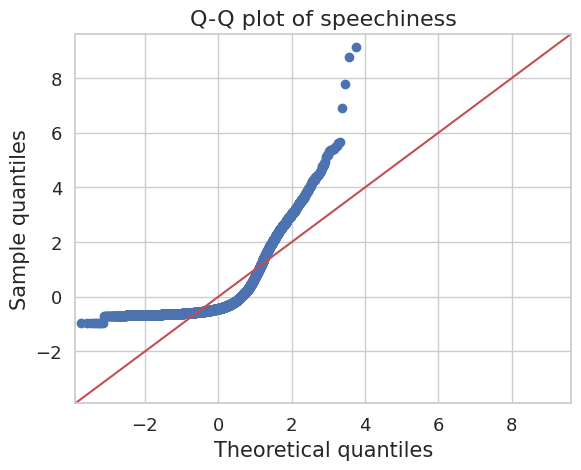

<Figure size 800x500 with 0 Axes>

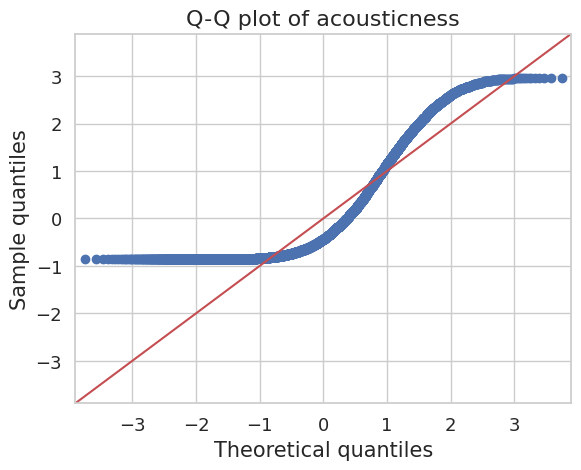

<Figure size 800x500 with 0 Axes>

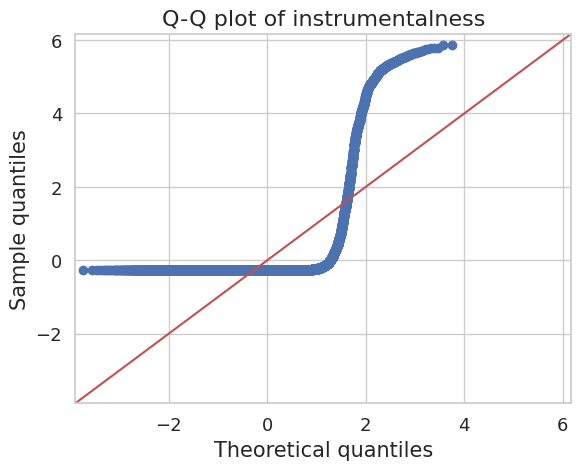

<Figure size 800x500 with 0 Axes>

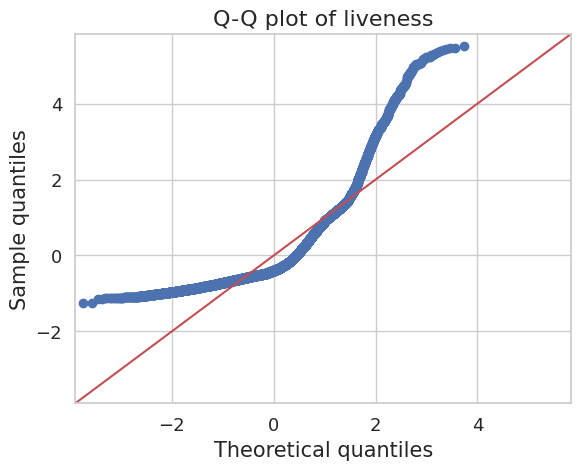

<Figure size 800x500 with 0 Axes>

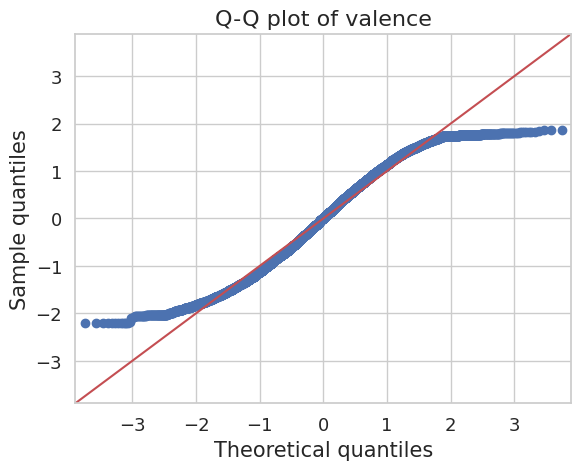

<Figure size 800x500 with 0 Axes>

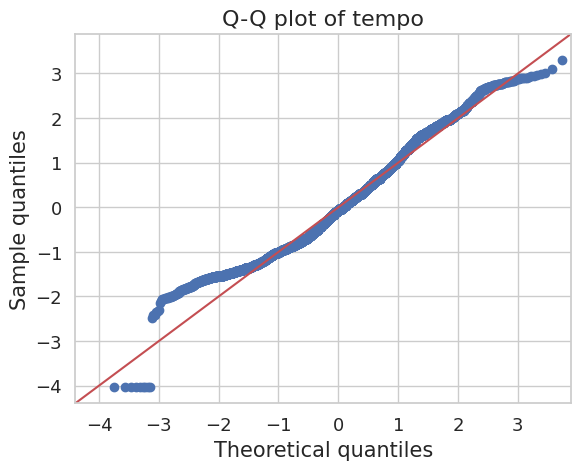

<Figure size 800x500 with 0 Axes>

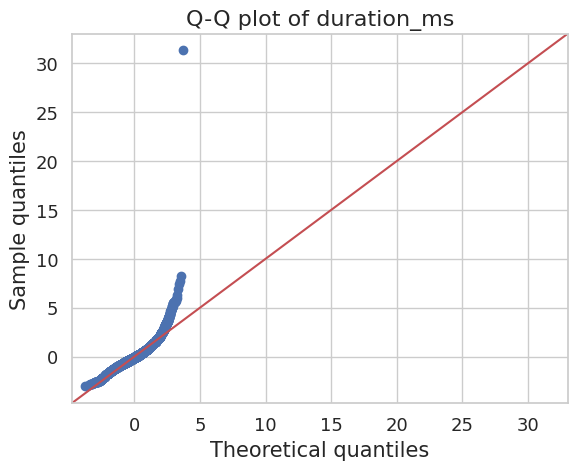

In [33]:
# qq plots for numeric variables to examine their statistical distribution - which ones follow an approximately normal distribution?
from statsmodels.graphics.gofplots import qqplot

data_norm = df[['popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

for c in data_norm.columns:
    plt.figure(figsize=(8, 5))
    qqplot(data_norm[c], line='45', fit=True)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

From the results of these plots, we can assess if our set of data plausibly came from some theoretical we can see at-a-glance if our assumptions are plausible, and if not, how the assumption is violated and what data points contribute to the violation.

Danceability:

### Multivariate Analysis

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
popularity,1.000000,0.102565,-0.010898,0.210559,-0.092412,0.055023,0.017471,-0.076843,-0.026988,-0.131195,0.009794,-0.156126
danceability,0.102565,1.000000,-0.010037,0.113631,-0.093683,0.229350,-0.100741,-0.192523,-0.068566,0.429634,-0.159778,-0.107006
energy,-0.010898,-0.010037,1.000000,0.706057,-0.065851,0.077926,-0.636531,-0.120807,0.166466,0.309813,0.159356,0.027095
loudness,0.210559,0.113631,0.706057,1.000000,-0.050317,0.090478,-0.484623,-0.321383,0.108930,0.174024,0.123373,-0.013479
mode,-0.092412,-0.093683,-0.065851,-0.050317,1.000000,-0.130863,0.080110,-0.003353,-0.020415,0.002341,0.006057,-0.042076
speechiness,0.055023,0.229350,0.077926,0.090478,-0.130863,1.000000,-0.102046,-0.091642,0.109017,0.024919,0.046147,-0.019009
acousticness,0.017471,-0.100741,-0.636531,-0.484623,0.080110,-0.102046,1.000000,0.125558,-0.099196,-0.135810,-0.104020,-0.114654
instrumentalness,-0.076843,-0.192523,-0.120807,-0.321383,-0.003353,-0.091642,0.125558,1.000000,-0.032377,-0.153569,-0.043851,0.017803
liveness,-0.026988,-0.068566,0.166466,0.108930,-0.020415,0.109017,-0.099196,-0.032377,1.000000,0.015550,0.006292,-0.007327
valence,-0.131195,0.429634,0.309813,0.174024,0.002341,0.024919,-0.135810,-0.153569,0.015550,1.000000,0.056548,-0.142598


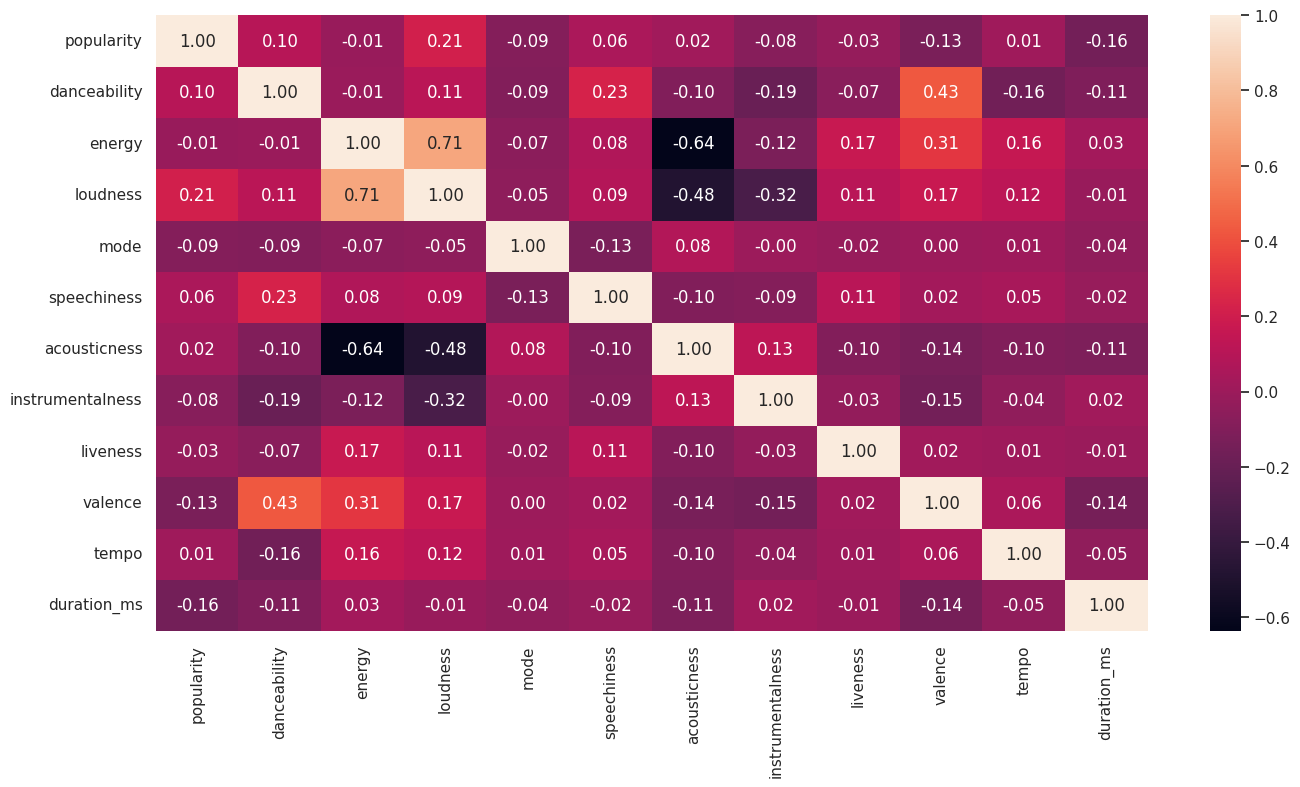

In [34]:
# Correlation matrix and heatmap between variables

corr_matrix=data_norm.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
corr_matrix

In [35]:
# How musical features across songs have changed over the years of this dataset

musical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence','speechiness']
average_by_year = df.groupby('year')[musical_features].mean().reset_index()
fig = px.line(average_by_year, x='year', y=musical_features)
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Value',
    title=dict(text='Musical Features Over the Years')
)
fig.show()

# Data Processing and Predictive Modeling